In [341]:
import pandas as pd
import numpy as np

cars = pd.read_csv('scout_ErsteDaten.csv', error_bad_lines=False, delimiter=';')
brands = pd.read_csv('Marken.csv', header= None, usecols=[0,1,3, 4] , error_bad_lines=False, delimiter=';', encoding='ISO-8859-1')
car_manufacturers = pd.read_csv('CarManufacturers.csv', error_bad_lines=False, delimiter=';')

In [342]:
#Generating year and month
cars["month"] = cars["data"].str.split('.').str[0]
cars["year"] = cars["data"].str.split('.').str[1]
cars.head()

,data,km,model,price,month,year
0,11.202,4'500 km,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,CHF 36'900.–,11,202
1,12.2013,153'200 km,MERCEDES-BENZ E 250 7G-Tronic,CHF 19'800.–,12,2013
2,3.202,6'900 km,BMW X3 M40d Individual Aut. 4x4 (CH),CHF 78'900.–,3,202
3,Neu,12 km,SUZUKI Swace 1.8 Hybrid Compact+,CHF 31'300.–,Neu,NaN
4,Neu,12 km,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,CHF 22'400.–,Neu,NaN


In [343]:
#Correcting year and month
cars["year"].unique()
cars["year"][cars["year"]=='191']='1910'
cars["year"][cars["year"]=='192']='1920'
cars["year"][cars["year"]=='193']='1930'
cars["year"][cars["year"]=='194']='1940'
cars["year"][cars["year"]=='195']='1950'
cars["year"][cars["year"]=='196']='1960'
cars["year"][cars["year"]=='197']='1970'
cars["year"][cars["year"]=='198']='1980'
cars["year"][cars["year"]=='199']='1990'
cars["year"][cars["year"]=='200']='2000'
cars["year"][cars["year"]=='201']='2010'
cars["year"][cars["year"]=='202']='2020'
cars["year"][cars["year"].isna()]='2021'
cars["month"][cars["month"]=="Neu"]='2'
cars["year"]=pd.to_numeric(cars["year"])

In [344]:
#Correcting km
cars["km"]=cars["km"].str.rstrip(' km')
cars['km'] = [float(val.replace("'","").strip()) for val in cars['km']]

In [345]:
#Correcting price
cars["price"]=cars["price"].str.lstrip('CHF ')
cars["price"]=cars["price"].str.rstrip('.–')
cars['price'] = pd.to_numeric(cars['price'].str.replace("'",''))

In [346]:
#Correcting model
cars["model2"]=cars["model"].str.lower()

In [347]:
# Generating brand:
cars["brand"] = cars["model2"].str.split(' ', 1).str.get(0)
cars.head()
cars["brand"][cars["brand"]=="aston"]="aston martin"
cars["brand"][cars["brand"]=="alfa"]="alfa romeo"
cars["brand"][cars["brand"]=="vw"]="volkswagen"
cars["brand"][cars["brand"]=="land"]="land rover"
cars["brand"][cars["brand"]=="austin"]="austin-healey"
cars["brand"][cars["brand"]=="triumph"]="standard-triumph"
cars["brand"][cars["brand"]=="amc"]="amc / eagle"
cars["brand"][cars["brand"]=="ds"]="ds automobiles"
cars["brand"][cars["brand"]=="bmw-alpina"]="bmw"




<ipython-input-347-2f47fc9e08dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="aston"]="aston martin"
<ipython-input-347-2f47fc9e08dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="alfa"]="alfa romeo"
<ipython-input-347-2f47fc9e08dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["brand"][cars["brand"]=="vw"]="volkswagen"
<ipython-input-347-2f47fc9e08dc>:7: Settin

In [348]:
car_manufacturers["brand"]=car_manufacturers["brand"].str.lower()

In [349]:
# Merge car dataset with manufacturer dataset
cars_merged = pd.merge(cars, car_manufacturers, how="left", on=["brand"])
cars_na = cars_merged[cars_merged["country"].isna()]
cars_na["brand"].unique()
cars_na.to_csv(r'cars_na.csv', index = False, header=True)
# Around 400 cars do not have a brand 

In [357]:
# Generate upper case letters for brands
cars_merged["brand"]=cars_merged["brand"].str.upper()

(147786, 8)


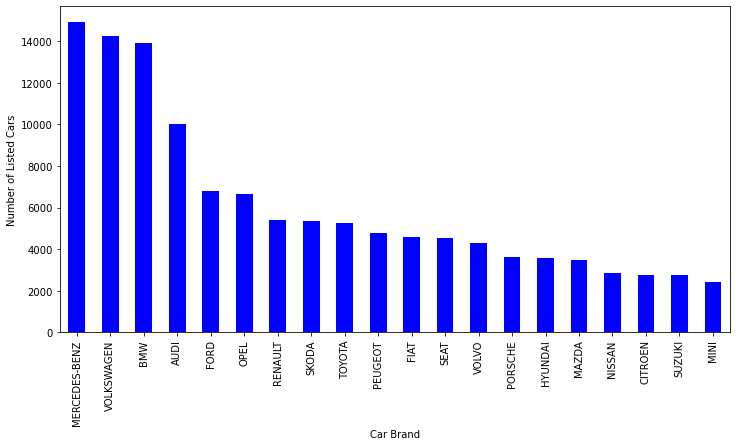

In [359]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
cars_merged.groupby('brand')['brand'].count().sort_values(ascending=False).head(20).plot.bar(color='b')
plt.ylabel('Number of Listed Cars')
plt.xlabel('Car Brand')
print(cars.shape)

Text(0.5, 0, 'Country of Car Manufacturer')

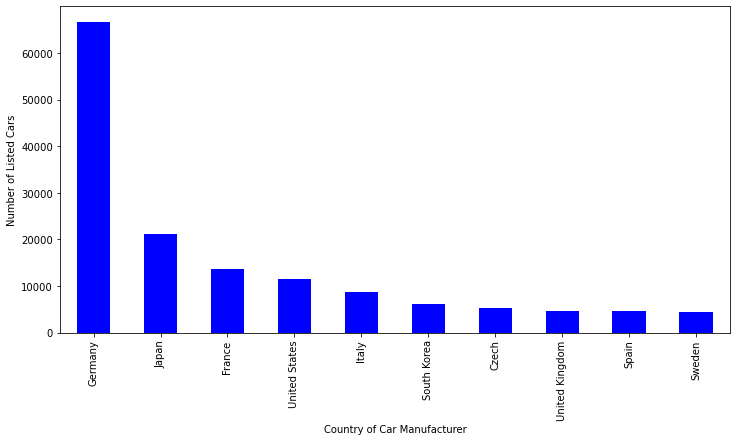

In [362]:
plt.figure(figsize=(12,6))
cars_merged.groupby('country')['country'].count().sort_values(ascending=False).head(10).plot.bar(color='b')
plt.ylabel('Number of Listed Cars')
plt.xlabel('Country of Car Manufacturer')

Text(0.5, 0, 'Car Model')

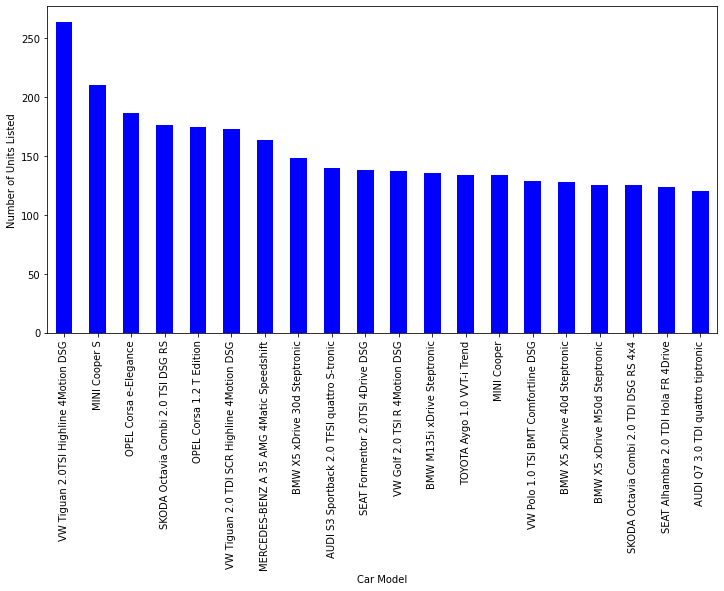

In [366]:
plt.figure(figsize=(12,6))
cars_merged.groupby('model')['model'].count().sort_values(ascending=False).head(20).plot.bar(color='b')
plt.ylabel('Number of Units Listed')
plt.xlabel('Car Model')

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x432 with 0 Axes>

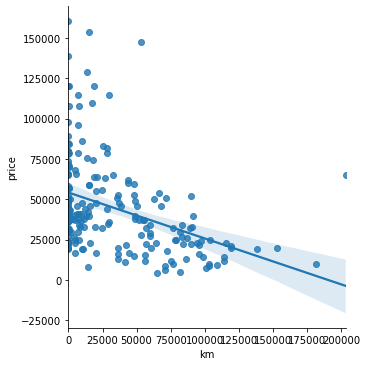

In [285]:
plt.figure(figsize=(12,6))
cars_tesla = cars.head(200)
sns.lmplot("km", "price", cars_small, palette="Set2")

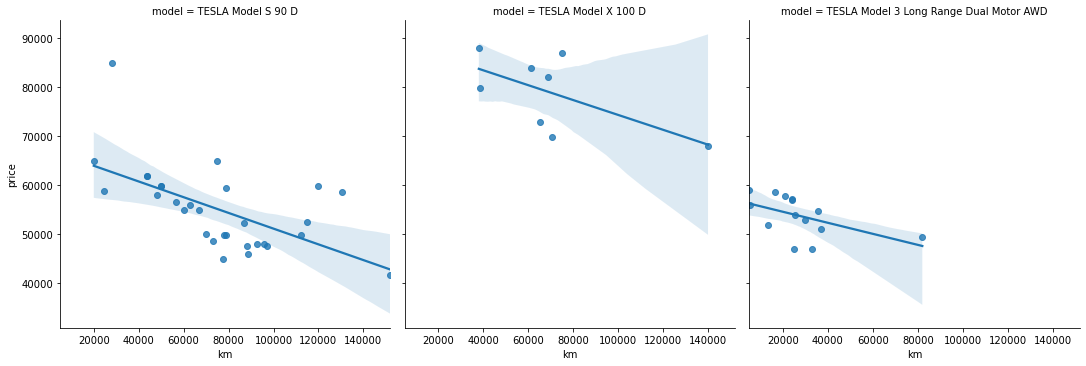

In [378]:
cars_tesla = cars[(cars["model"]=="TESLA Model S 90 D") | 
                             (cars["model"]=="TESLA Model 3 Long Range Dual Motor AWD") |
                             (cars["model"]=="TESLA Model X 100 D") 
                            ]
sns.lmplot("km", "price", cars_tesla, col="model")


In [400]:
from sklearn.linear_model import LinearRegression

x = cars_tesla["km"].values
y = cars_tesla["price"].values


length = cars_tesla.shape[0] 

x = x.reshape(length, 1)
y = y.reshape(length, 1)
                 
reg = LinearRegression().fit(x,y)
reg

LinearRegression()

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


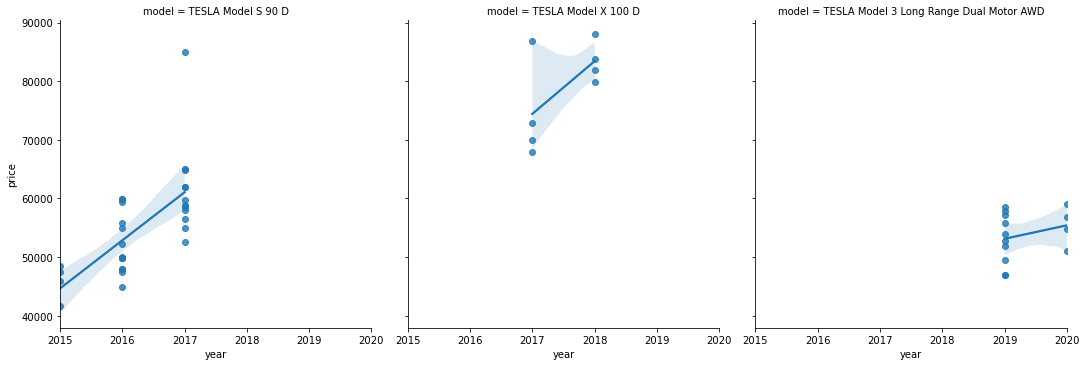

In [312]:
sns.lmplot("year", "price", cars_tesla, col="model")

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


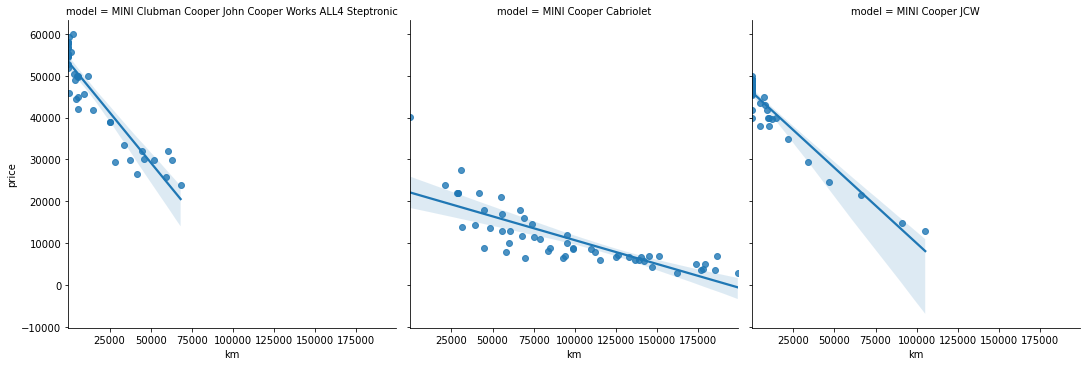

In [368]:
cars_mini = cars[(cars["model"]=="MINI Clubman Cooper John Cooper Works ALL4 Steptronic") | 
                             (cars["model"]=="MINI Cooper Cabriolet") |
                             (cars["model"]=="MINI Cooper JCW") 
                            ]
sns.lmplot("km", "price", cars_mini, col="model")



/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


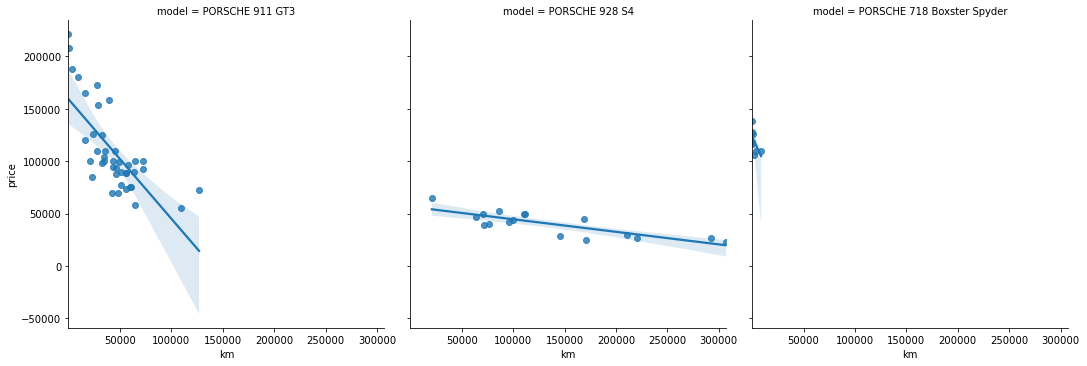

In [321]:
cars_porsche = cars[(cars["model"]=="PORSCHE 718 Boxster Spyder") | 
                             (cars["model"]=="PORSCHE 911 GT3") |
                             (cars["model"]=="PORSCHE 928 S4")] 
                 

sns.lmplot("km", "price", cars_porsche, col="model")

In [329]:
cars_porsche = cars[(cars["model"]=="ALFA ROMEO Stelvio 2.2 JTDM Super Q4 Automatic") | 
                             (cars["model"]=="ALFA ROMEO Giulia 2.0 Super Automatic")] 
                 

sns.lmplot("year", "price", cars_porsche, col="model")




AttributeError: module 'seaborn' has no attribute 'plt'

/Users/janruffner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


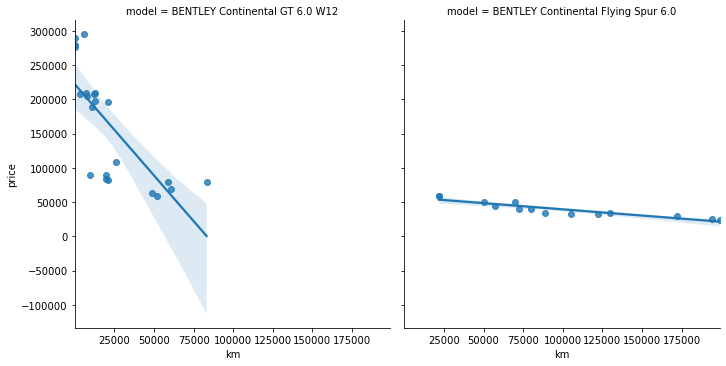

In [327]:
cars_porsche = cars[(cars["model"]=="BENTLEY Continental Flying Spur 6.0") | 
                             (cars["model"]=="BENTLEY Continental GT 6.0 W12")] 
                 

sns.lmplot("km", "price", cars_porsche, col="model")




In [87]:
newcars = pd.read_csv('newcar2.csv', error_bad_lines=False, delimiter=';')

In [88]:
# create identifier for new cars
newcars["id"]= np.arange(len(newcars))+1

In [89]:
#Correcting lowerbound and upperbound
newcars["lowerbound"]=newcars["lowerbound"].str.lstrip('CHF ')
newcars["lowerbound"]=newcars["lowerbound"].str.rstrip('.-')
newcars["upperbound"]=newcars["upperbound"].str.lstrip('CHF ')
newcars["upperbound"]=newcars["upperbound"].str.rstrip('.-')


In [90]:
#Correcting "door" variable
newcars["door"][newcars["door"]==45]='4-5'
newcars["door"][newcars["door"]==24]='2-4'
newcars["door"][newcars["door"]==35]='3-5'
newcars["door"][newcars["door"]==25]='2-5'
newcars["door"][newcars["door"]==34]='3-4'
newcars["door"].unique()

<ipython-input-90-ba4e5b565b33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcars["door"][newcars["door"]==45]='4-5'
<ipython-input-90-ba4e5b565b33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcars["door"][newcars["door"]==24]='2-4'
<ipython-input-90-ba4e5b565b33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcars["door"][newcars["door"]==35]='3-5'
<ipython-input-90-ba4e5b565b33>:5: SettingWithCopyWarning: 
A value

array([5, 2, '4-5', '3-5', '2-5', 3, 4], dtype=object)

In [91]:
# Convert variable "model_newcar" to new variable with low letters
newcars["model2"]=newcars["model_newcar"].str.lower()

In [92]:
newcars.head()


,PS,door,energy_efficiency,lowerbound,model_newcar,type_newcar,upperbound,use,id,model2
0,387-421PS,5,-,78'900.–,MERCEDES-BENZ GLA 45 AMG,(SUV / Geländewagen),84'400.–,-,1,mercedes-benz gla 45 amg
1,116-136PS,5,-,45'900.–,MERCEDES-BENZ GLB 180,(SUV / Geländewagen),57'280.–,52l100km,2,mercedes-benz glb 180
2,150-163PS,5,-,48'300.–,MERCEDES-BENZ GLB 200,(SUV / Geländewagen),61'780.–,52-73l100km,3,mercedes-benz glb 200
3,190PS,5,-,53'300.–,MERCEDES-BENZ GLB 220,(SUV / Geländewagen),64'030.–,57-62l100km,4,mercedes-benz glb 220
4,224PS,5,-,54'700.–,MERCEDES-BENZ GLB 250,(SUV / Geländewagen),65'430.–,76-85l100km,5,mercedes-benz glb 250


In [93]:
key2 = []
key3 = []
for j in newcars.index:
    for i in enumerate(cars["model2"]):
        if newcars["model2"][j] in i[1]:
            key = print(i[0],'', newcars["id"][j])
            key2.append(i[0])
            key3.append(newcars["id"][j])
            
            

7203  1
13366  1
15234  1
20319  1
21942  1
21944  1
23082  1
24563  1
26723  1
28381  1
29018  1
30161  1
33813  1
34325  1
35714  1
38220  1
38609  1
40089  1
43267  1
44220  1
46134  1
51424  1
54681  1
59079  1
60198  1
62602  1
62649  1
64078  1
64272  1
64308  1
66020  1
67305  1
69347  1
70786  1
71138  1
71784  1
74274  1
74547  1
77269  1
78110  1
78366  1
84876  1
92372  1
92707  1
93321  1
97931  1
100929  1
101161  1
105987  1
106165  1
110420  1
113386  1
114706  1
123510  1
124448  1
127740  1
131687  1
132008  1
134168  1
134604  1
134730  1
134767  1
136047  1
137706  1
137735  1
138656  1
140742  1
142275  1
9006  3
9045  3
21423  3
22513  3
28908  3
28945  3
32624  3
39638  3
41509  3
43822  3
44404  3
48396  3
50948  3
63975  3
73987  3
81863  3
83300  3
94949  3
95309  3
109321  3
122809  3
122810  3
122812  3
122873  3
125325  3
138733  3
144553  3
146764  3
26591  4
31713  4
40474  4
45308  4
49593  4
56759  4
69681  4
70880  4
74585  4
113745  4
125019  4
131747 

145744  13
146254  13
147353  13
33411  14
62566  14
105998  14
125961  14
132901  14
135319  14
137699  14
138312  14
15124  15
15251  15
25246  15
34597  15
43341  15
63814  15
66359  15
70877  15
82613  15
84088  15
84375  15
84767  15
85195  15
91660  15
100414  15
106816  15
108045  15
112657  15
112775  15
113602  15
119966  15
134261  15
143561  15
144115  15
147387  15
2177  16
6407  16
7314  16
9116  16
10577  16
14072  16
14780  16
15433  16
15518  16
16014  16
17633  16
18396  16
18606  16
19568  16
21115  16
23643  16
28895  16
29251  16
30491  16
31332  16
31452  16
31668  16
32426  16
33445  16
35102  16
35546  16
35777  16
36569  16
38282  16
38700  16
40958  16
41541  16
41937  16
42582  16
43293  16
43799  16
44319  16
45793  16
47622  16
48864  16
48872  16
49495  16
49496  16
50875  16
52235  16
52919  16
53783  16
55502  16
57033  16
59590  16
61518  16
63321  16
63871  16
63932  16
63985  16
63999  16
66880  16
67384  16
67667  16
67709  16
68265  16
68415  16
6874

49857  28
50809  28
50961  28
52054  28
53750  28
55123  28
55139  28
55639  28
56250  28
56502  28
58879  28
58900  28
58967  28
59435  28
59924  28
60098  28
60193  28
60219  28
60782  28
61791  28
63146  28
63167  28
63599  28
63790  28
63844  28
63876  28
64144  28
64148  28
64149  28
64458  28
64604  28
64657  28
65901  28
67510  28
68056  28
69319  28
69664  28
69675  28
70135  28
70143  28
70713  28
70825  28
71346  28
71438  28
71596  28
72033  28
72487  28
72830  28
73536  28
74099  28
74255  28
74331  28
74386  28
74424  28
74571  28
74657  28
74736  28
75114  28
76806  28
77541  28
78330  28
78702  28
78807  28
79425  28
80399  28
80694  28
80861  28
81159  28
83247  28
84178  28
84268  28
84474  28
85971  28
86010  28
88492  28
89762  28
91152  28
91570  28
91652  28
92566  28
92568  28
92586  28
93544  28
94041  28
95101  28
95132  28
95174  28
95185  28
95351  28
95422  28
96915  28
97150  28
97155  28
98405  28
98736  28
98861  28
100533  28
101825  28
102271  28
102714 

16259  37
17236  37
17789  37
17852  37
18612  37
20123  37
20124  37
22146  37
22556  37
22718  37
23800  37
24026  37
24632  37
25037  37
25382  37
26646  37
26648  37
26683  37
26685  37
26940  37
26966  37
27104  37
27136  37
27442  37
27910  37
28329  37
28355  37
28771  37
28772  37
29260  37
31147  37
33794  37
34655  37
35916  37
37676  37
37949  37
38235  37
38686  37
39635  37
39646  37
39742  37
39856  37
39907  37
39992  37
40043  37
40623  37
41423  37
41868  37
42286  37
43106  37
44117  37
44305  37
44592  37
45194  37
45900  37
46027  37
46184  37
46420  37
47706  37
48536  37
48780  37
49381  37
49596  37
49644  37
51157  37
51339  37
51436  37
51484  37
51642  37
52303  37
52740  37
52741  37
52916  37
53646  37
53842  37
54041  37
54835  37
55016  37
56155  37
57017  37
57228  37
57314  37
58159  37
58848  37
58853  37
60120  37
60252  37
60986  37
61932  37
62998  37
63121  37
63125  37
63737  37
64356  37
64572  37
66277  37
67019  37
70276  37
70818  37
70879  37


92672  45
93462  45
93728  45
93729  45
94040  45
94272  45
94411  45
94415  45
94474  45
95265  45
95477  45
95489  45
95497  45
95732  45
95748  45
95749  45
95884  45
96288  45
96290  45
96398  45
97076  45
97352  45
97821  45
99759  45
99765  45
100482  45
100608  45
100609  45
100945  45
101231  45
101464  45
101566  45
102657  45
102780  45
103149  45
103480  45
103857  45
103956  45
104296  45
104620  45
105400  45
105401  45
105446  45
106095  45
106314  45
108081  45
108174  45
108245  45
108555  45
109133  45
109615  45
109616  45
109623  45
109646  45
109683  45
109684  45
109685  45
110072  45
110257  45
111382  45
111590  45
111709  45
111929  45
112822  45
113857  45
114251  45
114280  45
114354  45
114689  45
116465  45
116708  45
116927  45
117243  45
117244  45
119821  45
119903  45
120011  45
120090  45
120216  45
120241  45
120298  45
120301  45
120303  45
120983  45
121476  45
121577  45
122085  45
122547  45
122558  45
122585  45
122696  45
123737  45
123744  45
12

118476  46
119021  46
119089  46
119106  46
119114  46
119132  46
119133  46
119134  46
119204  46
119554  46
119723  46
119962  46
119963  46
120081  46
120093  46
120122  46
120299  46
120300  46
120490  46
120788  46
120920  46
121030  46
121773  46
122069  46
122084  46
122554  46
122555  46
123608  46
123892  46
124281  46
124776  46
125114  46
125136  46
125903  46
126558  46
126559  46
126563  46
126762  46
126896  46
127673  46
127674  46
127815  46
127843  46
128437  46
128523  46
128666  46
128783  46
128901  46
129026  46
129148  46
129299  46
129300  46
129301  46
129304  46
129475  46
129476  46
129477  46
129478  46
129479  46
129494  46
130749  46
131778  46
133897  46
134008  46
134761  46
135862  46
135863  46
135879  46
136786  46
136996  46
137004  46
137244  46
137256  46
137263  46
137285  46
137405  46
138518  46
140289  46
140604  46
141960  46
142037  46
142181  46
143021  46
143098  46
143101  46
143201  46
144104  46
144236  46
144551  46
144875  46
145047  46

52188  48
52265  48
52269  48
52412  48
52470  48
53004  48
53051  48
53717  48
53876  48
53992  48
54038  48
54641  48
54890  48
54960  48
54990  48
55070  48
55124  48
55160  48
55236  48
55522  48
55634  48
55822  48
56090  48
56335  48
56350  48
56361  48
56373  48
56388  48
56419  48
56508  48
56509  48
56533  48
56544  48
56545  48
56565  48
56567  48
57054  48
57400  48
57648  48
57704  48
57733  48
57773  48
58102  48
58229  48
58494  48
58514  48
58533  48
58534  48
58611  48
58612  48
58613  48
58962  48
58991  48
58996  48
59028  48
59298  48
59771  48
60455  48
60834  48
60901  48
61667  48
62048  48
62227  48
62449  48
62545  48
62576  48
62728  48
62949  48
63162  48
63799  48
63940  48
64117  48
64400  48
64414  48
64588  48
64677  48
64696  48
65023  48
65204  48
66032  48
66067  48
66120  48
66257  48
66647  48
66702  48
66805  48
66992  48
67022  48
67112  48
67130  48
67131  48
67163  48
67177  48
67179  48
67187  48
67233  48
67417  48
67720  48
67723  48
68134  48


133577  52
135992  52
136218  52
138316  52
138394  52
138827  52
138983  52
139149  52
139269  52
140498  52
140886  52
140887  52
141157  52
142653  52
142659  52
143280  52
143471  52
144122  52
144177  52
145924  52
146155  52
146627  52
146628  52
146647  52
146958  52
146969  52
147070  52
147107  52
147168  52
147200  52
147453  52
147575  52
147750  52
300  53
302  53
11194  53
12716  53
15565  53
23206  53
30585  53
38019  53
39092  53
54407  53
62704  53
67377  53
79092  53
80001  53
88715  53
88800  53
88801  53
105408  53
107130  53
107636  53
107685  53
108905  53
109327  53
109340  53
109880  53
110368  53
110622  53
111925  53
112449  53
113122  53
114550  53
115241  53
115253  53
115999  53
117388  53
117435  53
118103  53
118732  53
118744  53
118777  53
118779  53
119448  53
119493  53
120460  53
120705  53
122110  53
122952  53
125435  53
125861  53
126176  53
126214  53
126344  53
126429  53
127037  53
127038  53
127107  53
127315  53
127603  53
128192  53
128852  5

1001  58
1589  58
1910  58
2012  58
2035  58
2156  58
2577  58
2660  58
3417  58
3573  58
3820  58
4129  58
4248  58
4439  58
4608  58
4637  58
4641  58
4792  58
4937  58
5240  58
5241  58
5324  58
5349  58
5544  58
5881  58
5884  58
5891  58
5968  58
5983  58
6020  58
6217  58
6233  58
6558  58
7083  58
7120  58
7163  58
7188  58
7930  58
8022  58
9034  58
9053  58
9100  58
9237  58
9320  58
9914  58
9975  58
10333  58
10387  58
10497  58
11200  58
11224  58
11297  58
11428  58
11432  58
11453  58
11581  58
11643  58
11662  58
11796  58
11822  58
11881  58
12672  58
12916  58
13142  58
13163  58
13181  58
13202  58
13273  58
13362  58
13379  58
13437  58
13466  58
13503  58
13667  58
13704  58
13764  58
13934  58
14583  58
14622  58
14884  58
15080  58
15346  58
15409  58
15577  58
15594  58
15920  58
16248  58
16382  58
16395  58
16622  58
16762  58
16763  58
16814  58
16878  58
16956  58
17087  58
17330  58
17345  58
17401  58
17444  58
17471  58
17634  58
17669  58
17811  58
18061 

127561  58
127667  58
127693  58
127917  58
127960  58
127975  58
127979  58
127982  58
127998  58
127999  58
128009  58
128018  58
128156  58
128303  58
128317  58
128318  58
128326  58
128327  58
128381  58
128564  58
128910  58
128980  58
129060  58
129361  58
129400  58
129512  58
129749  58
129836  58
129935  58
129936  58
129948  58
129967  58
129970  58
129972  58
129973  58
130053  58
130090  58
130123  58
130136  58
130137  58
130146  58
130158  58
130171  58
130183  58
130306  58
130307  58
130309  58
130356  58
130695  58
130733  58
130770  58
130863  58
130865  58
130927  58
131184  58
131220  58
131270  58
131460  58
131502  58
131543  58
131665  58
132013  58
132021  58
132022  58
132110  58
132114  58
132294  58
132313  58
132489  58
132729  58
132731  58
132844  58
132861  58
132878  58
132912  58
133029  58
133052  58
133055  58
133135  58
133156  58
133421  58
133435  58
133515  58
133593  58
133738  58
133791  58
133816  58
134091  58
134113  58
134115  58
134141  58

34156  60
34223  60
34241  60
34317  60
34339  60
34596  60
34954  60
35555  60
36070  60
37269  60
37299  60
37766  60
38493  60
38952  60
39285  60
39332  60
39501  60
40162  60
40241  60
40886  60
41067  60
41068  60
41243  60
41535  60
41603  60
41690  60
41767  60
42041  60
42074  60
42394  60
42433  60
43032  60
43080  60
43308  60
44176  60
44238  60
44254  60
44833  60
44853  60
44860  60
44884  60
46197  60
46720  60
46762  60
46821  60
46894  60
47083  60
47178  60
47247  60
47339  60
47735  60
47853  60
47954  60
48337  60
48338  60
48377  60
48633  60
48816  60
49023  60
49024  60
49238  60
49389  60
49424  60
50115  60
51790  60
52186  60
52252  60
52665  60
52772  60
53054  60
53071  60
53735  60
53807  60
54044  60
54207  60
54866  60
54905  60
55346  60
55351  60
55571  60
56000  60
56130  60
56390  60
56831  60
57034  60
57334  60
57924  60
58136  60
58198  60
58541  60
59026  60
59208  60
59577  60
60692  60
61237  60
61400  60
61958  60
62487  60
62526  60
62565  60


10929  63
14040  63
14246  63
17164  63
17373  63
17744  63
17963  63
17969  63
21794  63
22324  63
22769  63
23369  63
24040  63
24277  63
25877  63
25931  63
26148  63
27575  63
27718  63
29893  63
30106  63
31280  63
31281  63
31880  63
32320  63
32664  63
33733  63
35810  63
35831  63
35893  63
36342  63
36343  63
36488  63
36527  63
37543  63
38528  63
39474  63
40235  63
40596  63
40662  63
40756  63
41200  63
41428  63
42636  63
43071  63
43454  63
46033  63
46039  63
47636  63
48998  63
49944  63
50126  63
50944  63
51008  63
51991  63
52682  63
52693  63
52967  63
53307  63
56878  63
56896  63
57093  63
57208  63
59072  63
60737  63
61025  63
61806  63
63318  63
64526  63
64565  63
65104  63
65228  63
65664  63
67986  63
68249  63
68357  63
68719  63
72650  63
75502  63
76887  63
76937  63
76938  63
77849  63
78117  63
78155  63
78194  63
79928  63
80405  63
81673  63
81909  63
82780  63
82789  63
83531  63
83664  63
91244  63
93309  63
94727  63
95069  63
95099  63
95456  63


141384  68
141982  68
144600  68
145359  68
145402  68
145437  68
146603  68
147290  68
147335  68
269  69
2272  69
2273  69
2423  69
3154  69
4327  69
5784  69
7072  69
7360  69
7832  69
7926  69
8932  69
9501  69
10327  69
10520  69
10855  69
13498  69
14155  69
14606  69
15243  69
15495  69
15850  69
15883  69
16347  69
16572  69
16626  69
16850  69
17752  69
17813  69
18777  69
19035  69
19062  69
19759  69
19899  69
20139  69
20234  69
20642  69
21124  69
21407  69
21965  69
22348  69
22387  69
23302  69
23472  69
23910  69
24162  69
24855  69
25201  69
26197  69
26738  69
27794  69
28651  69
28834  69
28966  69
28967  69
28970  69
28971  69
28972  69
28974  69
29005  69
29333  69
29480  69
29562  69
29615  69
29668  69
29703  69
30131  69
30139  69
30407  69
30533  69
31271  69
32194  69
32197  69
33577  69
33940  69
35835  69
36742  69
36801  69
37596  69
38815  69
38884  69
39004  69
39234  69
39657  69
39798  69
41659  69
41698  69
42075  69
42986  69
43255  69
44744  69
45065

20057  72
20136  72
20200  72
20325  72
20354  72
20892  72
21020  72
21182  72
21250  72
21289  72
21349  72
21350  72
21368  72
21369  72
21386  72
21424  72
21440  72
21825  72
22055  72
22113  72
22282  72
22637  72
23008  72
23555  72
23743  72
23804  72
23861  72
23932  72
23933  72
24104  72
24166  72
24167  72
24222  72
24407  72
24692  72
24736  72
24822  72
24846  72
25369  72
25827  72
25828  72
25829  72
25830  72
25831  72
26272  72
27277  72
27569  72
27571  72
27943  72
28431  72
28520  72
28820  72
28946  72
28947  72
28948  72
28949  72
28950  72
28951  72
28952  72
28958  72
28959  72
28977  72
28978  72
28979  72
28980  72
28981  72
28982  72
28983  72
28984  72
28985  72
29001  72
29002  72
29003  72
29035  72
29414  72
29479  72
30415  72
30674  72
31326  72
32129  72
32531  72
32641  72
33019  72
33129  72
33388  72
33775  72
33838  72
34121  72
34268  72
35035  72
35080  72
35813  72
36209  72
36244  72
36448  72
36783  72
36915  72
37789  72
37798  72
37809  72


135568  73
135744  73
135840  73
136028  73
136496  73
136524  73
136525  73
138517  73
138869  73
139483  73
139774  73
139775  73
140067  73
140145  73
141057  73
141702  73
141703  73
141937  73
142572  73
142864  73
142865  73
143047  73
143282  73
143517  73
143518  73
144289  73
144290  73
144291  73
144299  73
144342  73
144405  73
144516  73
144543  73
144544  73
144545  73
144557  73
144784  73
144785  73
144841  73
145018  73
145218  73
145471  73
146026  73
146170  73
146695  73
146827  73
146828  73
146829  73
146831  73
147075  73
147249  73
147412  73
147495  73
2714  74
2799  74
3572  74
3901  74
4209  74
4515  74
4732  74
5575  74
8086  74
8213  74
8416  74
8455  74
8461  74
9309  74
9646  74
12698  74
12927  74
13375  74
15319  74
16112  74
16530  74
17314  74
17812  74
17861  74
19395  74
19401  74
19423  74
20014  74
20494  74
21002  74
21396  74
21773  74
21800  74
22151  74
22371  74
22775  74
23188  74
23584  74
23657  74
23732  74
23950  74
23990  74
24134  74
24

65946  76
68446  76
68450  76
68485  76
68949  76
70262  76
70576  76
70763  76
71050  76
72388  76
72456  76
72937  76
73234  76
73333  76
75646  76
76049  76
76423  76
76928  76
77664  76
78381  76
78545  76
78804  76
78947  76
80470  76
80849  76
81526  76
81717  76
82266  76
82280  76
82688  76
82866  76
82872  76
82923  76
82935  76
82944  76
83004  76
83147  76
83228  76
83308  76
83728  76
83781  76
83824  76
83875  76
84143  76
84357  76
84662  76
84682  76
84683  76
84814  76
85219  76
85314  76
85910  76
86067  76
86198  76
86203  76
86389  76
86448  76
86755  76
86891  76
87093  76
87142  76
87357  76
87407  76
87688  76
87712  76
87745  76
87811  76
90079  76
90741  76
92108  76
92276  76
92345  76
92361  76
92362  76
93692  76
93826  76
93865  76
94108  76
94507  76
94740  76
95142  76
95147  76
95204  76
95308  76
96157  76
96228  76
96346  76
96393  76
96394  76
96489  76
96681  76
96827  76
96828  76
96881  76
96882  76
97190  76
97266  76
97883  76
97977  76
98076  76


80321  77
80420  77
80429  77
80468  77
80588  77
80690  77
80703  77
81026  77
81062  77
81082  77
81339  77
81525  77
81613  77
81615  77
81696  77
81713  77
81720  77
81722  77
81743  77
81746  77
81778  77
81834  77
81835  77
81883  77
81930  77
81959  77
81974  77
81979  77
81991  77
82197  77
82210  77
82240  77
82263  77
82267  77
82321  77
82323  77
82329  77
82361  77
82392  77
82396  77
82412  77
82423  77
82450  77
82454  77
82460  77
82471  77
82502  77
82513  77
82754  77
82782  77
82881  77
82919  77
82927  77
83041  77
83044  77
83145  77
83153  77
83168  77
83188  77
83213  77
83232  77
83237  77
83238  77
83256  77
83259  77
83296  77
83310  77
83347  77
83361  77
83378  77
83403  77
83408  77
83419  77
83431  77
83432  77
83458  77
83484  77
83587  77
83735  77
83869  77
83873  77
83903  77
83926  77
83930  77
83942  77
83943  77
83947  77
84142  77
84224  77
84274  77
84297  77
84298  77
84303  77
84314  77
84315  77
84380  77
84382  77
84386  77
84420  77
84455  77


117830  77
117918  77
117950  77
118078  77
118133  77
118174  77
118206  77
118207  77
118214  77
118216  77
118217  77
118218  77
118225  77
118247  77
118249  77
118254  77
118255  77
118280  77
118327  77
118412  77
118428  77
118447  77
118455  77
118513  77
118514  77
118515  77
118516  77
118517  77
118518  77
118546  77
118547  77
118585  77
118586  77
118587  77
118588  77
118589  77
118590  77
118627  77
118686  77
118831  77
118909  77
118910  77
119040  77
119046  77
119097  77
119102  77
119166  77
119702  77
120126  77
120168  77
120215  77
120304  77
120507  77
120581  77
120613  77
120614  77
120615  77
120832  77
120896  77
120919  77
120940  77
120954  77
120995  77
121002  77
121023  77
121180  77
121316  77
121317  77
121347  77
121409  77
121433  77
121436  77
121456  77
121494  77
121513  77
121514  77
121522  77
121575  77
121658  77
121667  77
122050  77
122221  77
122231  77
122232  77
122233  77
122234  77
122292  77
122297  77
122347  77
122435  77
122440  77

22933  79
23634  79
23636  79
23661  79
23989  79
24225  79
24463  79
24560  79
24583  79
24949  79
25323  79
25718  79
25760  79
25775  79
25933  79
26134  79
26171  79
26632  79
26690  79
27257  79
27286  79
27799  79
27826  79
28012  79
28079  79
28118  79
28149  79
28186  79
28439  79
28786  79
28851  79
29259  79
29415  79
29583  79
29734  79
29825  79
30040  79
30448  79
30456  79
30556  79
30752  79
30949  79
31046  79
31105  79
31477  79
31478  79
31611  79
31638  79
32151  79
32246  79
32386  79
32638  79
32909  79
33069  79
33164  79
33310  79
33391  79
33738  79
33827  79
33836  79
34188  79
34984  79
35087  79
35206  79
35340  79
35372  79
35432  79
35447  79
35476  79
35483  79
35516  79
35671  79
35732  79
36146  79
36985  79
37036  79
37038  79
37071  79
37141  79
37223  79
37312  79
37372  79
37621  79
37644  79
37705  79
37757  79
37901  79
37921  79
37932  79
37968  79
38074  79
38307  79
38308  79
38348  79
39003  79
39075  79
39453  79
39462  79
39814  79
39971  79


9611  80
9862  80
10124  80
10431  80
12389  80
15417  80
15695  80
17772  80
20191  80
20942  80
21029  80
24173  80
24805  80
25167  80
25376  80
25782  80
26330  80
26331  80
26660  80
26705  80
26821  80
27159  80
27562  80
27692  80
27761  80
27817  80
28236  80
28905  80
29449  80
29684  80
29690  80
32169  80
32275  80
32321  80
32970  80
33496  80
34718  80
36846  80
36879  80
37279  80
37432  80
37490  80
37512  80
37583  80
37584  80
37865  80
38628  80
38675  80
38721  80
38748  80
39088  80
39137  80
39166  80
40399  80
40500  80
41952  80
42181  80
43628  80
43630  80
43634  80
43683  80
43890  80
44888  80
45519  80
45543  80
45675  80
45945  80
46023  80
46202  80
46256  80
46343  80
46405  80
46468  80
46522  80
46959  80
46966  80
49664  80
49834  80
50845  80
50849  80
52373  80
53777  80
55179  80
55356  80
55606  80
55645  80
55669  80
55756  80
55885  80
56231  80
56329  80
56355  80
56378  80
56391  80
57770  80
57932  80
58318  80
58336  80
59692  80
59746  80
59

126437  81
127120  81
127245  81
129766  81
130483  81
130710  81
131286  81
132635  81
133562  81
133828  81
133842  81
134266  81
134886  81
137693  81
137884  81
137999  81
138000  81
140337  81
141868  81
143370  81
143894  81
93696  83
75  84
197  84
296  84
311  84
312  84
390  84
449  84
530  84
581  84
1130  84
1150  84
1175  84
1201  84
1330  84
1356  84
1362  84
1418  84
1440  84
1506  84
1539  84
1556  84
1615  84
1616  84
1773  84
1795  84
1888  84
1904  84
1924  84
1975  84
2026  84
2065  84
2209  84
2274  84
2739  84
2740  84
2827  84
3010  84
3438  84
3463  84
3467  84
3547  84
3651  84
3776  84
3785  84
4080  84
4165  84
4196  84
4758  84
4856  84
4964  84
5284  84
5440  84
5461  84
5519  84
5726  84
6072  84
6105  84
6107  84
6334  84
6566  84
6624  84
6627  84
6714  84
6797  84
6974  84
7132  84
7276  84
7408  84
7416  84
7456  84
7504  84
7883  84
8004  84
8687  84
8973  84
8989  84
9042  84
9239  84
9306  84
9500  84
9584  84
9613  84
9705  84
10259  84
10282  84
10

96831  84
96832  84
96845  84
96862  84
96863  84
96875  84
96883  84
96884  84
96934  84
96935  84
96970  84
97057  84
97077  84
97136  84
97160  84
97330  84
97349  84
97427  84
97468  84
97581  84
97752  84
97809  84
97831  84
97864  84
97956  84
97962  84
98002  84
98205  84
98438  84
98539  84
98597  84
98723  84
98829  84
98873  84
98883  84
98981  84
99033  84
99036  84
99046  84
99055  84
99063  84
99118  84
99192  84
99213  84
99334  84
99448  84
99531  84
99683  84
99698  84
99715  84
99792  84
100006  84
100043  84
100120  84
100301  84
100537  84
100659  84
100768  84
100769  84
100770  84
100905  84
100906  84
100926  84
100943  84
100947  84
100948  84
100949  84
100950  84
100951  84
100997  84
101070  84
101095  84
101132  84
101178  84
101187  84
101198  84
101299  84
101394  84
101519  84
101534  84
101774  84
101965  84
101967  84
102208  84
102238  84
102245  84
102268  84
102285  84
102298  84
102322  84
102380  84
102504  84
102540  84
102541  84
102563  84
102564

39734  87
40277  87
40313  87
40322  87
40449  87
40744  87
42398  87
42405  87
42407  87
42543  87
43336  87
43464  87
44318  87
45126  87
45393  87
46418  87
46627  87
46676  87
47484  87
47593  87
47723  87
47770  87
47921  87
48296  87
49043  87
49145  87
49259  87
49370  87
49466  87
49609  87
50306  87
50345  87
50526  87
50565  87
50619  87
50649  87
51385  87
51718  87
51975  87
52799  87
52982  87
53000  87
53189  87
53637  87
53817  87
53839  87
54000  87
54535  87
54556  87
54714  87
54856  87
54895  87
55077  87
55376  87
55969  87
56219  87
56932  87
57544  87
58064  87
58066  87
58555  87
58570  87
58847  87
58953  87
59396  87
60993  87
61040  87
61089  87
61813  87
61823  87
62494  87
62710  87
62884  87
63781  87
64514  87
64660  87
64900  87
65274  87
66124  87
66250  87
66443  87
66475  87
66664  87
66812  87
66826  87
66835  87
67543  87
67608  87
67826  87
68300  87
68408  87
68739  87
68786  87
68905  87
69012  87
69017  87
69980  87
70169  87
70319  87
70790  87


45860  90
46043  90
46132  90
46163  90
46196  90
46259  90
46273  90
46403  90
46416  90
46437  90
46647  90
46715  90
46742  90
47094  90
47273  90
47381  90
47422  90
47554  90
47688  90
47733  90
47849  90
47880  90
48291  90
48316  90
48378  90
48694  90
48765  90
48819  90
49044  90
49106  90
49130  90
49136  90
49727  90
50176  90
50358  90
50370  90
50412  90
50413  90
50459  90
50461  90
50487  90
50562  90
50614  90
50760  90
50858  90
51108  90
51118  90
51178  90
51241  90
51328  90
51395  90
51450  90
51888  90
51889  90
51917  90
52076  90
52327  90
52334  90
52486  90
52524  90
52800  90
53290  90
53366  90
53403  90
53423  90
53443  90
53458  90
53768  90
53862  90
54047  90
54062  90
54303  90
54326  90
54504  90
54510  90
54589  90
54689  90
54692  90
54848  90
54852  90
54914  90
54941  90
54972  90
54973  90
54976  90
55167  90
55284  90
55326  90
55663  90
55823  90
55905  90
55916  90
55948  90
56076  90
56132  90
56218  90
56363  90
56409  90
56410  90
56433  90


24579  91
24584  91
24786  91
24793  91
25490  91
26506  91
26967  91
27919  91
27941  91
28082  91
28294  91
28448  91
28485  91
30205  91
30718  91
30734  91
30842  91
31891  91
32387  91
32765  91
33055  91
33546  91
34457  91
35418  91
35460  91
36869  91
38121  91
38175  91
38642  91
38836  91
40430  91
41893  91
42151  91
42289  91
42610  91
42700  91
43186  91
43301  91
43397  91
43400  91
44790  91
45018  91
45177  91
45432  91
45477  91
45499  91
45545  91
45560  91
45746  91
46663  91
47122  91
47697  91
48180  91
48857  91
48966  91
49005  91
49374  91
51080  91
51126  91
51213  91
51644  91
52272  91
52275  91
52292  91
52337  91
52386  91
52387  91
52388  91
52389  91
52390  91
52391  91
52392  91
52393  91
52395  91
52396  91
52397  91
52398  91
52410  91
52425  91
53631  91
53998  91
54532  91
55093  91
55279  91
55667  91
55862  91
58205  91
58315  91
60851  91
60858  91
60964  91
60965  91
60970  91
61425  91
61457  91
62686  91
63181  91
63676  91
63901  91
63943  91


7648  92
7761  92
8185  92
8477  92
8485  92
9339  92
10383  92
11197  92
11214  92
11369  92
12623  92
13189  92
13526  92
14657  92
14806  92
15313  92
15377  92
15796  92
16480  92
16944  92
16998  92
17083  92
17168  92
17421  92
17573  92
17643  92
17650  92
17651  92
17820  92
18428  92
18791  92
18821  92
18920  92
19682  92
19838  92
20044  92
20114  92
20131  92
20173  92
20357  92
20529  92
20607  92
20844  92
20916  92
22167  92
22216  92
22426  92
22433  92
23065  92
23794  92
23801  92
23836  92
23838  92
24124  92
24125  92
24158  92
24159  92
24160  92
24321  92
24539  92
24640  92
24844  92
24867  92
25258  92
25263  92
25527  92
25593  92
26218  92
26598  92
26754  92
27097  92
27142  92
27742  92
27811  92
27837  92
28006  92
28209  92
28689  92
29053  92
29220  92
29256  92
29322  92
29371  92
29483  92
29504  92
29613  92
30321  92
30672  92
30697  92
30698  92
30721  92
30766  92
30767  92
30877  92
30957  92
31062  92
31367  92
31413  92
31427  92
32349  92
32355 

132152  92
132219  92
132220  92
132229  92
132254  92
132261  92
132377  92
132503  92
132677  92
132678  92
133061  92
133062  92
133148  92
133362  92
133401  92
133663  92
133756  92
134073  92
134082  92
134127  92
134422  92
134434  92
134471  92
134543  92
134552  92
134724  92
134971  92
135057  92
135059  92
135124  92
135244  92
135245  92
135367  92
135558  92
135559  92
135797  92
135823  92
135825  92
135945  92
136101  92
136116  92
136538  92
136604  92
136935  92
136991  92
137107  92
137294  92
137340  92
137510  92
137643  92
137680  92
137748  92
138085  92
138126  92
138223  92
138339  92
138386  92
138715  92
139255  92
139560  92
139782  92
140001  92
140254  92
140378  92
140503  92
140961  92
141245  92
141249  92
141342  92
141362  92
141379  92
141469  92
141480  92
141481  92
141762  92
141848  92
141886  92
141933  92
141935  92
142016  92
142074  92
142091  92
142395  92
142405  92
142445  92
142457  92
142468  92
142714  92
143079  92
143195  92
143299  92

64947  95
66599  95
67328  95
68571  95
68602  95
70041  95
70414  95
75016  95
75231  95
75359  95
75862  95
75938  95
75964  95
76335  95
76540  95
77028  95
77129  95
77132  95
77182  95
77628  95
77675  95
77726  95
77929  95
78476  95
78825  95
78847  95
78876  95
78885  95
79358  95
79379  95
79413  95
79482  95
79545  95
79729  95
79890  95
80211  95
80346  95
80347  95
80381  95
80382  95
80383  95
80384  95
80385  95
80526  95
80664  95
80672  95
80844  95
80860  95
80878  95
81162  95
81311  95
82122  95
82123  95
82367  95
82607  95
82659  95
82664  95
82824  95
82961  95
82984  95
83697  95
83995  95
84703  95
84847  95
85035  95
85098  95
85614  95
85944  95
86513  95
86670  95
87577  95
87982  95
88308  95
88694  95
88778  95
88837  95
88898  95
89207  95
90096  95
91089  95
91188  95
91198  95
91669  95
92099  95
92113  95
92137  95
92139  95
93000  95
93423  95
93478  95
94258  95
94880  95
95316  95
95491  95
95552  95
97032  95
97048  95
97050  95
97051  95
97082  95


57422  100
57499  100
57511  100
58043  100
58223  100
58416  100
58476  100
58545  100
58723  100
59182  100
59418  100
59452  100
59582  100
59673  100
60074  100
60257  100
60459  100
60552  100
60570  100
61845  100
61874  100
61988  100
61998  100
62423  100
62446  100
62775  100
62781  100
62883  100
63210  100
63222  100
63502  100
63783  100
63832  100
64043  100
64707  100
64755  100
64793  100
65163  100
65195  100
65289  100
65298  100
65510  100
65517  100
65661  100
65714  100
65741  100
65815  100
65966  100
65981  100
66071  100
66220  100
66365  100
66377  100
66606  100
66885  100
66909  100
67033  100
67133  100
67520  100
67589  100
67865  100
67894  100
68025  100
68575  100
68576  100
68577  100
69292  100
69583  100
69735  100
70336  100
70375  100
71089  100
71141  100
71410  100
71758  100
71867  100
71910  100
72312  100
72570  100
73019  100
73975  100
74003  100
74069  100
74194  100
74651  100
74750  100
74826  100
75736  100
76007  100
76077  100
76329  100

3350  102
5813  102
6006  102
6007  102
6702  102
6968  102
8993  102
9038  102
9054  102
9843  102
9868  102
10062  102
10766  102
10767  102
11556  102
12577  102
13221  102
13281  102
13348  102
13828  102
13967  102
15723  102
15724  102
15745  102
16243  102
17565  102
18139  102
18474  102
18475  102
18477  102
18578  102
18584  102
18594  102
18595  102
19192  102
19462  102
19592  102
19913  102
20238  102
21134  102
21212  102
21231  102
21256  102
21698  102
22389  102
22409  102
23103  102
23125  102
23273  102
23290  102
23595  102
23607  102
23645  102
23984  102
24176  102
24204  102
24254  102
24619  102
25366  102
25367  102
25423  102
25641  102
26000  102
26060  102
27077  102
27246  102
27283  102
27549  102
28098  102
28282  102
28580  102
28608  102
28645  102
29054  102
29209  102
29544  102
30023  102
30348  102
30543  102
31370  102
31889  102
32013  102
33062  102
33109  102
34354  102
34610  102
34645  102
34828  102
34863  102
36062  102
36063  102
36378  102

22268  105
22401  105
23459  105
23575  105
23726  105
23810  105
25607  105
26258  105
26879  105
29505  105
32070  105
33331  105
34208  105
37942  105
39768  105
41796  105
45314  105
47711  105
49722  105
49889  105
52720  105
54918  105
55957  105
58046  105
60047  105
60062  105
60209  105
60210  105
60943  105
60999  105
62402  105
62979  105
63491  105
64543  105
66427  105
76420  105
76546  105
76750  105
77099  105
77394  105
77543  105
77648  105
77653  105
77677  105
77723  105
77795  105
78300  105
78511  105
80143  105
80263  105
85034  105
88582  105
90951  105
90952  105
91505  105
96704  105
103028  105
103029  105
104093  105
107238  105
109149  105
109382  105
109700  105
115610  105
126515  105
126938  105
135430  105
135814  105
138373  105
145668  105
471  106
842  106
912  106
5295  106
17440  106
25306  106
27358  106
28232  106
76391  106
77356  106
77851  106
79725  106
84055  106
98890  106
833  107
1697  107
1835  107
3104  107
3967  107
3986  107
4155  107


28464  113
29057  113
29443  113
29500  113
29849  113
29928  113
30018  113
30390  113
31027  113
32105  113
32216  113
32345  113
32360  113
32802  113
33516  113
33592  113
34374  113
34887  113
35480  113
35481  113
35482  113
35559  113
35560  113
35749  113
35844  113
35876  113
35956  113
36016  113
36090  113
36314  113
36415  113
37078  113
38336  113
38702  113
38744  113
38768  113
38769  113
39521  113
40272  113
41454  113
41533  113
41811  113
41850  113
41996  113
42009  113
42362  113
42815  113
42839  113
43214  113
43251  113
43816  113
43984  113
44087  113
44088  113
44092  113
44989  113
45286  113
45967  113
46395  113
46606  113
46717  113
46818  113
47586  113
47625  113
47772  113
48058  113
48485  113
49822  113
50340  113
50422  113
50423  113
50633  113
51104  113
51255  113
51338  113
52349  113
52505  113
53001  113
53248  113
53520  113
54118  113
54223  113
54629  113
54645  113
54846  113
55107  113
55239  113
55419  113
56235  113
57404  113
57556  113

137058  117
137059  117
138405  117
139186  117
139497  117
140006  117
140007  117
140008  117
140009  117
140010  117
140011  117
140012  117
140013  117
140035  117
140078  117
140101  117
140117  117
140352  117
140353  117
140458  117
140460  117
140461  117
140566  117
140594  117
140595  117
140802  117
140894  117
140896  117
140953  117
141079  117
141080  117
141205  117
141734  117
141735  117
141787  117
141807  117
142018  117
142084  117
142085  117
142161  117
142216  117
142217  117
142218  117
142245  117
142506  117
142803  117
142925  117
142929  117
143009  117
143046  117
143089  117
143127  117
143159  117
143180  117
143542  117
143543  117
143544  117
144096  117
144321  117
144524  117
144616  117
144617  117
144911  117
144922  117
144975  117
145169  117
145278  117
145384  117
145812  117
146532  117
146633  117
146782  117
146896  117
147190  117
147667  117
1115  118
1153  118
1245  118
2042  118
3900  118
5168  118
5737  118
5876  118
5914  118
6632  118


143149  122
143150  122
143649  122
143752  122
143754  122
143768  122
143771  122
143775  122
143795  122
145371  122
145884  122
145920  122
146422  122
146437  122
146918  122
146919  122
146924  122
94  123
159  123
213  123
1104  123
1373  123
1374  123
2154  123
10479  123
12827  123
17047  123
17358  123
24916  123
25224  123
28493  123
30334  123
30881  123
31565  123
31578  123
31597  123
32229  123
33073  123
35740  123
36176  123
38075  123
38718  123
39326  123
39703  123
39960  123
40517  123
41658  123
41943  123
41944  123
41979  123
41987  123
42744  123
42745  123
44547  123
44901  123
44906  123
44961  123
45685  123
47108  123
47399  123
47546  123
48037  123
48055  123
48898  123
50100  123
50104  123
50711  123
52826  123
54477  123
55104  123
56294  123
57166  123
58292  123
58896  123
59765  123
60653  123
60821  123
61408  123
61495  123
62349  123
62559  123
62800  123
63246  123
63290  123
63438  123
64241  123
65056  123
65576  123
65853  123
69041  123
6921

27648  125
92015  125
103985  125
111916  125
145590  125
7256  126
9463  126
12244  126
20301  126
21689  126
21959  126
22141  126
24473  126
25239  126
27855  126
34137  126
40182  126
47793  126
74944  126
78015  126
78168  126
84993  126
100900  126
101404  126
108344  126
109301  126
113401  126
124540  126
125567  126
125568  126
136380  126
138383  126
143856  126
146892  126
60  127
198  127
545  127
1918  127
2679  127
3312  127
3535  127
3719  127
4089  127
4136  127
4260  127
4282  127
4920  127
5334  127
5472  127
5593  127
7131  127
7248  127
8114  127
8998  127
9065  127
9759  127
9808  127
10060  127
10192  127
10269  127
10730  127
10970  127
10987  127
11395  127
11481  127
11665  127
11913  127
13467  127
13665  127
13843  127
13898  127
13969  127
14126  127
14242  127
14695  127
16281  127
16284  127
16597  127
16749  127
16810  127
16920  127
17099  127
17320  127
17434  127
17525  127
17536  127
18444  127
18561  127
18771  127
19081  127
19862  127
20308  127
20

143278  127
143520  127
144931  127
145087  127
145088  127
145314  127
145451  127
146032  127
146086  127
146302  127
146560  127
147058  127
147061  127
147401  127
183  128
740  128
9160  128
10446  128
11795  128
11840  128
14303  128
14840  128
15353  128
19096  128
24570  128
27548  128
30905  128
35417  128
35694  128
36439  128
37652  128
39689  128
39838  128
43788  128
44598  128
45944  128
46482  128
47135  128
47471  128
47920  128
50111  128
50731  128
52204  128
52869  128
53487  128
58042  128
63105  128
64625  128
69796  128
70827  128
71195  128
72082  128
72337  128
73065  128
73394  128
73696  128
73978  128
74489  128
76942  128
79004  128
79124  128
80162  128
81459  128
83498  128
83549  128
84151  128
84255  128
84733  128
85663  128
87701  128
88478  128
88621  128
89802  128
89872  128
90636  128
90874  128
91078  128
91205  128
91429  128
92098  128
92268  128
92307  128
92859  128
93221  128
93570  128
93589  128
93590  128
93591  128
93749  128
93796  128
9

44999  130
45001  130
45069  130
45425  130
46053  130
46929  130
46983  130
46984  130
48009  130
50163  130
60269  130
61179  130
61514  130
61527  130
61528  130
62151  130
65886  130
65907  130
70865  130
71388  130
72080  130
72270  130
72327  130
72845  130
73123  130
73124  130
73131  130
73132  130
73133  130
73134  130
73671  130
75047  130
76929  130
77162  130
81180  130
82553  130
82562  130
82591  130
83593  130
83594  130
83974  130
84881  130
85934  130
86332  130
87718  130
87926  130
87957  130
88606  130
88644  130
89388  130
89703  130
90523  130
90782  130
90832  130
90877  130
91344  130
91373  130
91374  130
91415  130
92029  130
92367  130
92530  130
92544  130
92597  130
93108  130
93163  130
93222  130
93668  130
93669  130
93670  130
95372  130
95737  130
96158  130
96611  130
96669  130
97706  130
99214  130
99333  130
99689  130
99701  130
101475  130
101518  130
103021  130
104773  130
105226  130
107234  130
109428  130
110146  130
112026  130
112665  130


14241  132
16004  132
19117  132
19199  132
23057  132
28601  132
29416  132
29722  132
32510  132
34809  132
38617  132
39149  132
46973  132
47055  132
51284  132
52246  132
53982  132
54694  132
54749  132
57683  132
62082  132
70218  132
70535  132
71775  132
72353  132
72829  132
73362  132
75049  132
79333  132
80726  132
82309  132
85512  132
86811  132
88125  132
90962  132
93675  132
96787  132
96788  132
96841  132
98469  132
98470  132
99879  132
101303  132
113121  132
114420  132
114882  132
114967  132
115229  132
117064  132
117121  132
119496  132
120125  132
122725  132
122911  132
123769  132
127320  132
128165  132
129540  132
129807  132
131755  132
132601  132
135905  132
136653  132
137482  132
138887  132
140518  132
142107  132
143176  132
145198  132
145242  132
147004  132
147656  132
674  133
1606  133
1645  133
1685  133
2069  133
3022  133
3239  133
4661  133
4678  133
4808  133
5000  133
5088  133
5237  133
5387  133
5462  133
5499  133
5559  133
5893  133

53632  136
53878  136
55693  136
56441  136
57800  136
58196  136
59756  136
59757  136
59764  136
59798  136
59868  136
60665  136
61275  136
61622  136
62142  136
62214  136
62215  136
62216  136
62217  136
62218  136
62219  136
62220  136
62221  136
62222  136
62223  136
62224  136
62225  136
62459  136
63427  136
64909  136
65733  136
65929  136
68482  136
70442  136
70654  136
72068  136
72141  136
72242  136
72252  136
73615  136
76154  136
76178  136
76209  136
76500  136
76549  136
76615  136
77402  136
77454  136
77621  136
78045  136
78298  136
78325  136
78614  136
79616  136
80714  136
81314  136
81320  136
81777  136
82073  136
82463  136
82493  136
82804  136
82874  136
83088  136
85056  136
85351  136
86553  136
86802  136
86808  136
88335  136
88336  136
88751  136
89013  136
89450  136
89984  136
90357  136
90392  136
90548  136
90696  136
91763  136
92049  136
93103  136
95008  136
95584  136
95820  136
96057  136
96936  136
97338  136
98059  136
98600  136
98843  136

45599  140
45616  140
45903  140
46211  140
46274  140
46396  140
46397  140
47741  140
48155  140
48269  140
49146  140
49148  140
49151  140
49166  140
49205  140
49338  140
49580  140
50337  140
50543  140
50590  140
50973  140
51347  140
51741  140
51770  140
51979  140
51999  140
52278  140
52698  140
52833  140
52934  140
52952  140
54162  140
54982  140
55291  140
56009  140
56452  140
56910  140
57330  140
57361  140
58421  140
58635  140
59165  140
59464  140
59710  140
59947  140
59975  140
60241  140
60554  140
61098  140
61207  140
61704  140
62002  140
62020  140
62071  140
62212  140
62213  140
62371  140
62505  140
63055  140
63629  140
63850  140
64157  140
64193  140
64275  140
64394  140
64523  140
65001  140
65338  140
65612  140
66042  140
66844  140
66914  140
66947  140
66986  140
67208  140
67634  140
68200  140
68268  140
69070  140
69759  140
70200  140
70508  140
70607  140
70704  140
70715  140
72187  140
72224  140
72344  140
73354  140
73461  140
73465  140

115617  142
116072  142
116095  142
116208  142
116209  142
116903  142
116995  142
117003  142
117135  142
117550  142
117561  142
118123  142
118162  142
118475  142
118537  142
118566  142
118921  142
119085  142
119955  142
120592  142
120926  142
120991  142
121035  142
121356  142
121721  142
122118  142
122333  142
122513  142
124179  142
124320  142
124500  142
124687  142
124700  142
125087  142
125088  142
125091  142
125385  142
125436  142
125509  142
125849  142
125862  142
126088  142
126113  142
127626  142
127783  142
128237  142
128311  142
129339  142
129740  142
129805  142
130239  142
133848  142
134325  142
134383  142
134774  142
135547  142
135548  142
135549  142
135682  142
135706  142
135854  142
136194  142
137337  142
137793  142
138218  142
138310  142
138657  142
138863  142
139462  142
139742  142
140045  142
140047  142
140607  142
141710  142
141756  142
142696  142
142697  142
142698  142
142699  142
142700  142
142701  142
142702  142
142716  142
1427

14794  144
15748  144
17637  144
19437  144
20038  144
20121  144
20246  144
23516  144
23954  144
23987  144
25162  144
27686  144
27723  144
28331  144
29403  144
29506  144
30528  144
34148  144
39957  144
41226  144
41487  144
43383  144
46154  144
46781  144
47100  144
47222  144
50286  144
50351  144
55779  144
57920  144
64626  144
65536  144
67307  144
67775  144
68893  144
69314  144
69941  144
71769  144
77067  144
78696  144
78846  144
79310  144
79954  144
80264  144
81438  144
82877  144
86441  144
90315  144
94956  144
95172  144
95529  144
97084  144
99426  144
99748  144
100391  144
103126  144
103215  144
103929  144
104760  144
105063  144
105104  144
111174  144
111175  144
111574  144
111970  144
112318  144
115926  144
124550  144
124796  144
127902  144
128191  144
128489  144
128617  144
130250  144
130453  144
131394  144
131694  144
132269  144
132270  144
132587  144
132852  144
133230  144
133291  144
133374  144
133763  144
133774  144
134507  144
136638  14

46009  146
46407  146
46424  146
46425  146
46938  146
46941  146
47231  146
47265  146
47282  146
47887  146
47931  146
48730  146
48855  146
49202  146
49211  146
49217  146
49218  146
49258  146
49721  146
49845  146
50342  146
50395  146
51540  146
51551  146
52360  146
52901  146
53111  146
53880  146
54757  146
55032  146
55200  146
55807  146
56532  146
57151  146
57157  146
57362  146
57364  146
57493  146
57519  146
58219  146
58963  146
59668  146
59738  146
59794  146
59805  146
60123  146
60175  146
60304  146
60423  146
60864  146
60866  146
61033  146
61091  146
61444  146
61721  146
62235  146
62236  146
62270  146
62280  146
63173  146
63221  146
63715  146
63780  146
63789  146
64463  146
64540  146
64624  146
64640  146
64659  146
64688  146
64698  146
64924  146
65039  146
65213  146
65578  146
65616  146
65751  146
66575  146
66616  146
66618  146
66619  146
66683  146
66706  146
66734  146
66735  146
66737  146
66738  146
66739  146
66740  146
66741  146
66742  146

54399  148
54779  148
55257  148
55422  148
55512  148
55543  148
55551  148
55717  148
55815  148
55901  148
56025  148
56789  148
56793  148
56868  148
57027  148
57063  148
57379  148
57390  148
57577  148
57579  148
57666  148
57669  148
57686  148
57731  148
57824  148
57919  148
57931  148
58011  148
58370  148
58371  148
58383  148
58412  148
58951  148
58968  148
59391  148
59411  148
59449  148
59630  148
59659  148
59880  148
59882  148
59937  148
59983  148
60179  148
60196  148
60477  148
60982  148
61073  148
61138  148
61166  148
61203  148
61204  148
61601  148
61731  148
61798  148
61843  148
61929  148
62028  148
62258  148
62492  148
62563  148
62646  148
62841  148
63262  148
63396  148
63430  148
63496  148
63894  148
64462  148
64511  148
64644  148
64675  148
64706  148
65047  148
65069  148
65669  148
65779  148
65781  148
66216  148
66349  148
66439  148
66442  148
66849  148
67153  148
67265  148
67333  148
67511  148
67684  148
67776  148
68362  148
68363  148

65474  150
66150  150
66153  150
66556  150
67626  150
67946  150
68715  150
69037  150
69118  150
69907  150
70325  150
70428  150
70613  150
71290  150
71291  150
71318  150
71398  150
72117  150
72165  150
72198  150
72217  150
72574  150
72614  150
72805  150
72890  150
73067  150
73081  150
73215  150
73290  150
73334  150
73412  150
73630  150
73983  150
74115  150
76080  150
76302  150
76357  150
76633  150
76803  150
77113  150
77446  150
77452  150
77478  150
77486  150
77535  150
77691  150
77692  150
77897  150
77932  150
78340  150
78374  150
78425  150
78598  150
78616  150
78654  150
78693  150
78797  150
78905  150
79012  150
79112  150
79488  150
79518  150
79658  150
79797  150
79926  150
80165  150
80362  150
80642  150
80881  150
80980  150
81135  150
81246  150
81247  150
81284  150
81285  150
81531  150
82382  150
82461  150
82957  150
82958  150
83029  150
83248  150
83624  150
83753  150
83771  150
83884  150
84249  150
84343  150
84667  150
84722  150
84852  150

74105  151
74151  151
74161  151
74330  151
74541  151
74558  151
74566  151
74638  151
75146  151
75196  151
75389  151
76068  151
76157  151
76656  151
77106  151
77108  151
77122  151
77304  151
77501  151
77503  151
77504  151
77828  151
77922  151
78078  151
78103  151
78339  151
78403  151
78678  151
78689  151
78865  151
78977  151
79013  151
79203  151
79910  151
80340  151
81031  151
81138  151
81248  151
81282  151
81368  151
82062  151
82284  151
82485  151
83007  151
83024  151
83560  151
83584  151
83605  151
83750  151
83778  151
83852  151
83918  151
83928  151
84023  151
84344  151
84359  151
84360  151
84361  151
84715  151
84756  151
84771  151
84774  151
84824  151
84890  151
85207  151
85343  151
85413  151
85432  151
85531  151
85700  151
85718  151
85893  151
85904  151
86153  151
86168  151
86169  151
86170  151
86171  151
86172  151
86210  151
86238  151
86263  151
86264  151
86362  151
86470  151
86517  151
86526  151
86527  151
86528  151
86552  151
86560  151

109204  152
109263  152
109710  152
110658  152
110665  152
111048  152
111587  152
113168  152
113477  152
114242  152
114390  152
114640  152
114670  152
115391  152
116577  152
117383  152
118338  152
118562  152
119930  152
120524  152
121159  152
121310  152
121440  152
121718  152
122205  152
122320  152
122654  152
122841  152
123024  152
123651  152
124285  152
124756  152
124807  152
124841  152
125497  152
126776  152
127013  152
127366  152
127675  152
128801  152
128802  152
128803  152
129046  152
129140  152
129355  152
129473  152
129538  152
129735  152
130063  152
130139  152
130278  152
130350  152
130476  152
130787  152
131398  152
131453  152
131454  152
131455  152
132162  152
132389  152
132741  152
133377  152
133404  152
133559  152
134278  152
134480  152
135869  152
135871  152
136620  152
137009  152
137150  152
137374  152
137443  152
137781  152
137863  152
137889  152
137890  152
138186  152
138212  152
138215  152
138294  152
138319  152
140380  152
1403

44812  157
45085  157
45418  157
45782  157
45788  157
45906  157
46569  157
46698  157
46873  157
47087  157
47289  157
47349  157
47454  157
47702  157
47977  157
48042  157
48215  157
48260  157
48424  157
48482  157
48699  157
48956  157
48957  157
48958  157
49207  157
49214  157
49303  157
49392  157
49632  157
49793  157
49816  157
49824  157
49869  157
50030  157
50091  157
50256  157
50264  157
50994  157
51230  157
51231  157
51437  157
51483  157
51548  157
52453  157
52969  157
53066  157
53136  157
53751  157
53918  157
54021  157
54065  157
55192  157
55241  157
55396  157
55702  157
55959  157
55975  157
56028  157
56172  157
56175  157
56176  157
56726  157
56917  157
56949  157
57192  157
57296  157
57724  157
57730  157
57982  157
58098  157
58099  157
58100  157
58141  157
58189  157
58255  157
58273  157
58630  157
58771  157
58912  157
58922  157
59240  157
59282  157
59650  157
59780  157
59782  157
60185  157
60357  157
60536  157
60789  157
60879  157
60887  157

95787  158
96415  158
98378  158
98465  158
98782  158
98854  158
98875  158
98877  158
99121  158
103573  158
105202  158
108169  158
109009  158
109126  158
109518  158
110294  158
110325  158
111024  158
111329  158
112715  158
113406  158
113563  158
113989  158
116902  158
116998  158
118935  158
119916  158
120379  158
120601  158
121714  158
123083  158
126575  158
131264  158
136367  158
136696  158
137600  158
139597  158
139654  158
142228  158
142250  158
142429  158
142432  158
143209  158
147267  158
860  159
1134  159
1379  159
1525  159
1977  159
1988  159
2018  159
3807  159
5163  159
7348  159
11007  159
14051  159
15324  159
17667  159
20856  159
24546  159
25049  159
25146  159
25833  159
26200  159
26580  159
27135  159
29286  159
29754  159
30115  159
31083  159
33083  159
33412  159
34683  159
35397  159
36615  159
37669  159
39847  159
39867  159
39881  159
40463  159
41974  159
47063  159
47284  159
47520  159
48339  159
49298  159
50292  159
51119  159
51276  1

51070  162
51289  162
51507  162
51534  162
51549  162
51735  162
51736  162
51748  162
51844  162
51976  162
51984  162
51987  162
52051  162
52301  162
52449  162
52523  162
52644  162
52680  162
52715  162
52739  162
52793  162
52882  162
52887  162
53017  162
53304  162
53312  162
53323  162
53359  162
53405  162
53447  162
53503  162
53617  162
53640  162
53649  162
53811  162
53989  162
54193  162
54197  162
54215  162
54276  162
54304  162
54311  162
54322  162
54425  162
54553  162
54665  162
54670  162
54675  162
54701  162
54883  162
55197  162
55528  162
55709  162
55857  162
55870  162
55884  162
55976  162
56036  162
56342  162
56343  162
56344  162
56503  162
56562  162
56657  162
56716  162
56892  162
57071  162
57131  162
57142  162
57164  162
57177  162
57178  162
57276  162
57466  162
57476  162
57497  162
57505  162
57740  162
57833  162
58036  162
58269  162
58390  162
58438  162
58710  162
59090  162
59245  162
59360  162
59424  162
59775  162
59776  162
59787  162

131345  162
131476  162
131731  162
132001  162
132002  162
132101  162
132316  162
132643  162
132956  162
132983  162
133219  162
133256  162
133257  162
133285  162
133441  162
133584  162
133904  162
133925  162
134099  162
134103  162
134183  162
134323  162
134521  162
134667  162
134877  162
134905  162
135000  162
135084  162
135202  162
135339  162
135480  162
135604  162
135669  162
135687  162
135722  162
135723  162
135803  162
135841  162
135843  162
135932  162
136096  162
136125  162
136297  162
136409  162
136430  162
136581  162
136624  162
136777  162
136783  162
136917  162
136956  162
137003  162
137079  162
137082  162
137168  162
137258  162
137596  162
137874  162
137912  162
138151  162
138397  162
138436  162
138537  162
138557  162
138558  162
138584  162
138585  162
138641  162
138703  162
138799  162
138800  162
138903  162
138951  162
139220  162
139299  162
139392  162
140278  162
140354  162
140534  162
140686  162
140688  162
140710  162
140715  162
1408

67476  164
67975  164
67976  164
68666  164
69035  164
69183  164
70814  164
72530  164
72898  164
73206  164
73374  164
73557  164
74447  164
74472  164
74478  164
74481  164
74500  164
74521  164
74524  164
74735  164
75264  164
75797  164
76113  164
76301  164
76536  164
76892  164
77309  164
77487  164
77494  164
77738  164
77973  164
78218  164
78336  164
78431  164
79102  164
79168  164
79322  164
79438  164
79723  164
80152  164
80161  164
80184  164
80265  164
80267  164
80359  164
80573  164
80602  164
80646  164
80647  164
80809  164
81158  164
81328  164
81922  164
81925  164
82042  164
82129  164
82230  164
82261  164
82446  164
82521  164
82556  164
82801  164
82818  164
82930  164
82931  164
83554  164
83658  164
83659  164
83660  164
83661  164
83662  164
83663  164
83747  164
83752  164
83904  164
83982  164
84130  164
84149  164
84404  164
84444  164
84596  164
84621  164
84650  164
84743  164
84853  164
85015  164
85130  164
85133  164
85175  164
85234  164
85241  164

103939  167
104250  167
104266  167
105166  167
105206  167
105382  167
105462  167
105854  167
106425  167
106702  167
106712  167
106857  167
106920  167
107269  167
107461  167
107479  167
107664  167
108035  167
108771  167
109524  167
109663  167
109693  167
110195  167
110304  167
111663  167
112183  167
112197  167
112198  167
112234  167
112670  167
112696  167
112826  167
114735  167
116788  167
117942  167
117943  167
117944  167
117945  167
118690  167
118840  167
118841  167
120277  167
120466  167
120655  167
121051  167
121052  167
121578  167
123098  167
124289  167
125410  167
125555  167
126588  167
128134  167
129501  167
129863  167
129864  167
129865  167
130134  167
130606  167
131326  167
131965  167
132595  167
132687  167
134637  167
134751  167
135275  167
135434  167
135566  167
136159  167
136611  167
136720  167
136721  167
137077  167
137078  167
137208  167
137218  167
137691  167
137752  167
137861  167
138926  167
139093  167
139689  167
141673  167
1419

91363  171
91391  171
91594  171
91747  171
91776  171
92404  171
92791  171
93558  171
93608  171
93816  171
94648  171
94649  171
95148  171
95183  171
95277  171
95581  171
95620  171
96128  171
96422  171
96797  171
96798  171
96901  171
97326  171
98242  171
99142  171
99176  171
99253  171
99578  171
99845  171
99942  171
100128  171
100590  171
100594  171
100747  171
101412  171
101732  171
101878  171
101912  171
102236  171
102545  171
102841  171
103593  171
103933  171
104048  171
104100  171
104887  171
105073  171
105154  171
105488  171
105530  171
105539  171
105659  171
105957  171
106424  171
106429  171
106560  171
106896  171
106966  171
106971  171
108006  171
108108  171
108496  171
108926  171
109038  171
109362  171
109784  171
109932  171
109934  171
110196  171
110495  171
110831  171
111042  171
111338  171
111565  171
111595  171
111629  171
111918  171
112092  171
112157  171
112242  171
112700  171
113037  171
113090  171
113107  171
113668  171
114100  17

26145  174
33099  174
48994  174
74008  174
75401  174
75943  174
76405  174
76537  174
78195  174
78303  174
80336  174
80631  174
81862  174
83842  174
87730  174
104553  174
105304  174
109253  174
110611  174
115783  174
145911  174
1940  175
4186  175
6014  175
7343  175
7945  175
11070  175
11219  175
11236  175
24986  175
26128  175
31014  175
31015  175
31016  175
32604  175
33098  175
33529  175
35318  175
37658  175
38432  175
39380  175
40749  175
44729  175
45005  175
47420  175
51783  175
54316  175
55381  175
55386  175
55425  175
58743  175
62229  175
62230  175
62231  175
62232  175
62233  175
63136  175
63468  175
63515  175
64643  175
65107  175
65662  175
65663  175
70004  175
71440  175
72256  175
72923  175
75396  175
75766  175
75840  175
75930  175
76201  175
76377  175
76831  175
78290  175
79302  175
85740  175
91003  175
91983  175
92204  175
93056  175
104492  175
104720  175
105900  175
105902  175
108173  175
109592  175
110492  175
111880  175
135838  175


20416  180
22411  180
24530  180
24828  180
28588  180
30287  180
30852  180
31835  180
33065  180
34458  180
35438  180
35736  180
36774  180
36799  180
36876  180
36886  180
36975  180
37202  180
37527  180
37528  180
37529  180
37577  180
38305  180
39228  180
40964  180
42661  180
42807  180
43722  180
44926  180
44959  180
47164  180
47710  180
47924  180
48151  180
49250  180
49716  180
50109  180
52171  180
53850  180
55790  180
56074  180
56468  180
56529  180
57203  180
62871  180
64747  180
66053  180
66527  180
67657  180
69248  180
69444  180
69554  180
69781  180
70445  180
70486  180
71493  180
71997  180
76829  180
78314  180
79121  180
79280  180
81396  180
82041  180
82821  180
83787  180
83867  180
84651  180
85327  180
93076  180
94342  180
101420  180
109033  180
109927  180
114498  180
115078  180
118631  180
118952  180
119092  180
120397  180
120663  180
122162  180
122932  180
124206  180
124875  180
126030  180
131685  180
131923  180
134024  180
134470  180
13

143093  189
143106  189
143130  189
143131  189
143132  189
143133  189
143135  189
143508  189
143510  189
143901  189
144077  189
144205  189
144313  189
144453  189
144703  189
145004  189
145154  189
145322  189
145447  189
145648  189
145649  189
145650  189
145651  189
145652  189
145694  189
145695  189
146065  189
146469  189
146906  189
146916  189
146926  189
146953  189
146954  189
146955  189
147321  189
147478  189
147768  189
147779  189
6996  190
13525  190
17352  190
29240  190
62624  190
76910  190
84126  190
92032  190
101752  190
111895  190
113380  190
115820  190
121165  190
121839  190
136856  190
1090  191
1425  191
1544  191
1802  191
2608  191
5819  191
6166  191
6613  191
9278  191
10450  191
10523  191
12603  191
13326  191
14289  191
15026  191
15293  191
15464  191
15632  191
16235  191
18789  191
18819  191
24232  191
24641  191
25773  191
26129  191
26179  191
26295  191
26609  191
27519  191
27864  191
29530  191
30162  191
30630  191
31311  191
31886  1

131010  192
131068  192
131069  192
131070  192
131131  192
131132  192
131137  192
131296  192
131406  192
131409  192
131645  192
131660  192
131690  192
131692  192
131740  192
131758  192
131897  192
132658  192
132697  192
132704  192
132705  192
133683  192
133960  192
134219  192
134224  192
134340  192
134342  192
134485  192
134516  192
135159  192
135356  192
135388  192
135893  192
135930  192
135963  192
136122  192
136135  192
136160  192
136161  192
136317  192
136536  192
136537  192
136578  192
136629  192
136760  192
136960  192
136985  192
137641  192
137935  192
138416  192
138605  192
138696  192
138865  192
139065  192
139344  192
139479  192
140798  192
140938  192
141061  192
141380  192
141505  192
141583  192
141770  192
141903  192
142160  192
142600  192
142772  192
142995  192
143128  192
143129  192
143506  192
143507  192
143509  192
143534  192
143535  192
143763  192
144019  192
144022  192
144249  192
144311  192
144779  192
145576  192
145646  192
1456

27221  201
27238  201
27253  201
28368  201
29050  201
29625  201
31224  201
31324  201
31325  201
32374  201
32586  201
33053  201
33437  201
33635  201
33722  201
33751  201
33864  201
34362  201
34725  201
34965  201
35109  201
35144  201
35173  201
35321  201
35515  201
35576  201
36159  201
36545  201
36864  201
37144  201
37651  201
38662  201
38745  201
38787  201
39052  201
39530  201
39714  201
39846  201
40066  201
40901  201
41077  201
41112  201
41133  201
41446  201
41596  201
41975  201
42625  201
42870  201
42872  201
43210  201
44126  201
44165  201
44773  201
44880  201
45007  201
45267  201
45358  201
46000  201
46111  201
46205  201
46431  201
47078  201
47214  201
47459  201
48886  201
49032  201
49948  201
50142  201
51434  201
51986  201
52025  201
53028  201
54252  201
54479  201
54832  201
55250  201
55491  201
55548  201
55671  201
56097  201
56331  201
56623  201
56742  201
57302  201
57854  201
57892  201
57903  201
58082  201
58094  201
58706  201
59284  201

67617  204
67880  204
67999  204
68060  204
68109  204
68535  204
68615  204
68616  204
68874  204
69098  204
69121  204
69318  204
69358  204
69467  204
69612  204
69806  204
69855  204
69896  204
69988  204
70050  204
71427  204
71501  204
72760  204
72982  204
73765  204
74983  204
74987  204
75059  204
75334  204
75335  204
75350  204
75377  204
75591  204
75676  204
75754  204
76137  204
76220  204
76485  204
76635  204
76757  204
76793  204
76862  204
77121  204
77126  204
77134  204
77261  204
77436  204
77823  204
77853  204
77854  204
77862  204
78148  204
78359  204
78472  204
78657  204
78658  204
78662  204
78671  204
78806  204
79158  204
79175  204
79284  204
79384  204
79389  204
79442  204
79576  204
79615  204
79827  204
79829  204
79957  204
80208  204
80209  204
80252  204
80277  204
80305  204
80319  204
80400  204
80476  204
80908  204
80966  204
81055  204
81156  204
81168  204
81169  204
81472  204
81537  204
81610  204
81640  204
81643  204
81658  204
81665  204

85644  207
86331  207
86369  207
86466  207
86731  207
86817  207
86818  207
87529  207
87650  207
88351  207
88377  207
88379  207
88436  207
88596  207
88619  207
89115  207
89186  207
89266  207
89269  207
89290  207
89736  207
89808  207
90469  207
90821  207
90851  207
90853  207
90854  207
90942  207
91041  207
91079  207
91119  207
91149  207
91401  207
91468  207
91504  207
91651  207
91982  207
91995  207
91996  207
91997  207
91998  207
92281  207
92407  207
92666  207
92740  207
92900  207
93140  207
93298  207
93308  207
93703  207
93847  207
94005  207
94062  207
94186  207
94221  207
94295  207
94511  207
94862  207
95234  207
95580  207
95683  207
95811  207
95823  207
95908  207
96061  207
96105  207
96457  207
96603  207
96987  207
97010  207
97045  207
97238  207
97342  207
97401  207
97473  207
97474  207
97475  207
97602  207
97674  207
97693  207
97786  207
97925  207
98182  207
98795  207
99582  207
99796  207
100472  207
101307  207
101530  207
101790  207
101929

43700  210
44588  210
44632  210
44898  210
45000  210
46092  210
46248  210
46563  210
47502  210
48033  210
48056  210
49523  210
51941  210
52247  210
53466  210
54554  210
55758  210
56428  210
58268  210
58582  210
58733  210
58734  210
59425  210
59433  210
59906  210
59908  210
60366  210
61110  210
61384  210
61507  210
61761  210
62065  210
62795  210
63189  210
63273  210
63641  210
63713  210
63798  210
63984  210
64936  210
65076  210
65275  210
65397  210
65505  210
65734  210
66013  210
66298  210
66333  210
66878  210
67421  210
67471  210
67488  210
67599  210
67600  210
67774  210
67797  210
67989  210
67990  210
67991  210
68045  210
68267  210
68710  210
68771  210
69425  210
69446  210
69523  210
69524  210
69773  210
69936  210
70502  210
70733  210
70993  210
71333  210
72558  210
72800  210
73456  210
73687  210
74612  210
74613  210
74676  210
74727  210
75243  210
75493  210
76147  210
76444  210
76644  210
77034  210
77433  210
77443  210
77470  210
78602  210

123791  212
124160  212
125595  212
125871  212
126259  212
126866  212
127959  212
128629  212
129188  212
129401  212
130054  212
130115  212
130522  212
130875  212
131046  212
131514  212
133805  212
134561  212
134562  212
135412  212
135882  212
135997  212
136181  212
136582  212
136583  212
136584  212
136665  212
137633  212
141393  212
142935  212
143206  212
143641  212
143861  212
144801  212
146015  212
146585  212
1952  213
11280  213
12162  213
14014  213
15471  213
43820  213
53227  213
64389  213
73666  213
105648  213
147042  213
69  214
2333  214
4322  214
5546  214
6841  214
7149  214
7406  214
7445  214
7618  214
10273  214
10702  214
11247  214
11427  214
12260  214
12293  214
12515  214
13083  214
13096  214
13531  214
13813  214
15069  214
15105  214
15223  214
16473  214
17004  214
17394  214
17435  214
17709  214
18389  214
19433  214
20868  214
21676  214
23085  214
23722  214
23948  214
25000  214
25042  214
25791  214
26631  214
26662  214
26954  214
27538 

58213  218
58275  218
58581  218
58602  218
58609  218
58725  218
58735  218
58736  218
59143  218
59203  218
59308  218
59309  218
59329  218
59361  218
59380  218
59455  218
59504  218
59774  218
59808  218
59835  218
60063  218
60291  218
60307  218
60308  218
60345  218
60375  218
60376  218
60377  218
60593  218
60614  218
61172  218
61229  218
61341  218
61602  218
61696  218
61763  218
61873  218
61881  218
61916  218
62172  218
62786  218
62820  218
62825  218
62890  218
62917  218
63157  218
63161  218
63241  218
63274  218
63982  218
64760  218
65027  218
65214  218
65684  218
65888  218
65922  218
65933  218
65941  218
66152  218
66425  218
66528  218
66580  218
67010  218
67124  218
67166  218
67655  218
67753  218
67836  218
67886  218
67943  218
68271  218
68804  218
69023  218
69064  218
69135  218
69138  218
69600  218
69644  218
69801  218
69879  218
69932  218
69937  218
70062  218
70079  218
70105  218
70140  218
70162  218
70210  218
70258  218
70518  218
70520  218

137774  219
140861  219
140980  219
141608  219
142047  219
142423  219
143202  219
143227  219
1823  220
2760  220
2866  220
4005  220
6998  220
10850  220
11069  220
11188  220
11209  220
12192  220
13005  220
19560  220
22245  220
25072  220
31019  220
33857  220
35461  220
36955  220
37572  220
38979  220
39523  220
39941  220
41783  220
44883  220
45419  220
46220  220
46786  220
49192  220
49742  220
51903  220
52868  220
54986  220
55025  220
56469  220
59125  220
59129  220
59254  220
62862  220
66408  220
74143  220
76323  220
76822  220
77351  220
85001  220
85810  220
88454  220
92073  220
96002  220
98601  220
102506  220
124960  220
124961  220
126954  220
137535  220
138634  220
138935  220
139300  220
139604  220
141607  220
145122  220
145123  220
1479  221
1601  221
1866  221
1937  221
2487  221
3074  221
3489  221
3752  221
4877  221
5012  221
5412  221
6083  221
6115  221
7099  221
7214  221
9467  221
9673  221
9674  221
10618  221
10652  221
11011  221
11404  221
12

28665  227
29546  227
29547  227
29782  227
30100  227
30890  227
31038  227
31607  227
32059  227
32148  227
32158  227
32351  227
32579  227
32761  227
33201  227
33368  227
33817  227
35100  227
35507  227
35856  227
35902  227
36287  227
36362  227
36680  227
36932  227
37573  227
37956  227
38341  227
38428  227
38566  227
38713  227
38739  227
38794  227
38818  227
38833  227
38852  227
38971  227
39101  227
39244  227
39309  227
40121  227
40499  227
40711  227
41127  227
41554  227
42203  227
42656  227
42682  227
43043  227
43067  227
43116  227
43441  227
43493  227
43735  227
44123  227
44733  227
45111  227
45152  227
45188  227
45254  227
45323  227
45544  227
45562  227
45762  227
45766  227
46021  227
46229  227
46233  227
46591  227
46785  227
46853  227
47236  227
47310  227
47448  227
47483  227
47763  227
47782  227
47794  227
48166  227
48193  227
48194  227
48205  227
48207  227
48219  227
48225  227
48254  227
48656  227
48787  227
48949  227
49006  227
49011  227

140805  233
141555  233
142291  233
142356  233
142904  233
143317  233
143318  233
143319  233
143320  233
143321  233
144397  233
144623  233
144624  233
144743  233
144821  233
144823  233
144824  233
144943  233
145003  233
145057  233
145062  233
145063  233
145420  233
145421  233
145705  233
145856  233
145885  233
145937  233
146082  233
146083  233
146084  233
146085  233
146440  233
146710  233
18569  234
23926  234
23962  234
23998  234
25661  234
27050  234
29731  234
30827  234
37562  234
39933  234
39934  234
54449  234
61373  234
73216  234
76050  234
77767  234
77768  234
78711  234
99778  234
107046  234
110400  234
110745  234
110753  234
113128  234
113206  234
115179  234
117375  234
118742  234
119347  234
121902  234
127574  234
129579  234
130636  234
134445  234
135318  234
140785  234
144625  234
145220  234
147315  234
21174  235
24896  235
27591  235
29159  235
31690  235
33431  235
46665  235
47566  235
50861  235
57887  235
60004  235
60070  235
63864  235


79262  240
79417  240
79529  240
80632  240
80721  240
80810  240
81571  240
83940  240
84795  240
85502  240
85958  240
86861  240
87186  240
87409  240
87977  240
89327  240
89346  240
89347  240
89362  240
89385  240
89387  240
89528  240
89546  240
89930  240
91648  240
92067  240
92473  240
93202  240
93206  240
93276  240
93303  240
93853  240
93906  240
94132  240
94476  240
94493  240
94843  240
95651  240
96240  240
96441  240
96978  240
97597  240
97694  240
97695  240
98681  240
99027  240
99028  240
99695  240
99723  240
99777  240
99785  240
99828  240
99979  240
100062  240
101277  240
102071  240
102724  240
103565  240
103653  240
104144  240
105171  240
105643  240
106221  240
107919  240
107920  240
108437  240
108631  240
108671  240
108766  240
109681  240
110264  240
111107  240
112747  240
115602  240
115669  240
117670  240
117857  240
118210  240
118474  240
118984  240
119003  240
119223  240
119960  240
120931  240
121547  240
121771  240
122651  240
123123  2

54894  247
55872  247
56634  247
57211  247
57377  247
57571  247
57756  247
57774  247
58471  247
59390  247
59648  247
60145  247
60170  247
60189  247
60669  247
60799  247
61705  247
61768  247
62463  247
62488  247
62696  247
62950  247
63135  247
63424  247
64558  247
65652  247
65818  247
67406  247
68095  247
68604  247
68965  247
69058  247
69536  247
69624  247
69820  247
69884  247
69974  247
71078  247
71823  247
71931  247
72346  247
73087  247
73658  247
75289  247
76236  247
76257  247
76486  247
77939  247
78380  247
78456  247
78578  247
78655  247
79667  247
79768  247
79993  247
80407  247
80472  247
82605  247
83677  247
84601  247
85003  247
85220  247
85243  247
88065  247
88277  247
88368  247
89964  247
91273  247
92807  247
93086  247
93125  247
93369  247
98018  247
100130  247
103217  247
104528  247
104868  247
105455  247
107535  247
107598  247
109078  247
109336  247
109534  247
110570  247
111545  247
111938  247
112127  247
114135  247
114553  247
11595

109166  248
109178  248
109402  248
109410  248
109537  248
109647  248
109948  248
109971  248
110000  248
110199  248
110569  248
110713  248
110988  248
111163  248
111506  248
111602  248
111770  248
111933  248
112584  248
112680  248
112828  248
113100  248
113173  248
113188  248
113274  248
113285  248
113385  248
113820  248
114790  248
114850  248
115215  248
115263  248
115297  248
115303  248
115880  248
115890  248
115938  248
115957  248
115974  248
116183  248
116576  248
117095  248
117341  248
117471  248
117522  248
117523  248
117541  248
118084  248
119012  248
119091  248
119277  248
119380  248
119673  248
119940  248
120032  248
120461  248
120469  248
120523  248
120824  248
120981  248
121022  248
121353  248
121629  248
121752  248
121758  248
121759  248
121760  248
121792  248
122058  248
122161  248
122270  248
122712  248
122986  248
123434  248
123597  248
123659  248
124098  248
124223  248
124392  248
124511  248
124512  248
124657  248
124660  248
1248

94780  254
94788  254
94789  254
94806  254
95211  254
95218  254
95256  254
95259  254
95260  254
95261  254
95305  254
95400  254
95444  254
95528  254
95618  254
95858  254
95909  254
95916  254
95965  254
95966  254
96121  254
96237  254
96360  254
96717  254
96802  254
96954  254
97339  254
97697  254
98131  254
98133  254
98189  254
98402  254
98403  254
98423  254
98652  254
98653  254
98657  254
98658  254
98666  254
99162  254
99304  254
99346  254
99675  254
100058  254
100059  254
100219  254
100241  254
100242  254
100365  254
100425  254
100431  254
100508  254
100786  254
100806  254
100935  254
100994  254
101168  254
101214  254
101715  254
101733  254
102035  254
102042  254
102097  254
102174  254
102192  254
102260  254
102894  254
103180  254
103719  254
104043  254
104186  254
104315  254
104390  254
104472  254
104746  254
104805  254
105146  254
105147  254
105175  254
105176  254
105182  254
105214  254
105601  254
105608  254
105620  254
105663  254
105664  254

143399  255
143429  255
143796  255
143957  255
143977  255
144138  255
144139  255
144160  255
144161  255
144162  255
144192  255
144683  255
145565  255
145878  255
146768  255
147103  255
147605  255
147664  255
147702  255
2  256
19  256
133  256
155  256
178  256
275  256
505  256
543  256
883  256
1042  256
1331  256
1796  256
2694  256
3506  256
4370  256
4727  256
5035  256
5289  256
5840  256
6750  256
6834  256
6893  256
7045  256
7162  256
7971  256
8386  256
8425  256
8449  256
8796  256
8821  256
9030  256
9595  256
9696  256
10695  256
10815  256
11126  256
11402  256
11550  256
11738  256
12381  256
12697  256
13338  256
13340  256
14148  256
14214  256
14934  256
15295  256
15567  256
16126  256
16488  256
16655  256
17019  256
17961  256
19118  256
19133  256
19335  256
19446  256
19539  256
19548  256
19559  256
19585  256
20021  256
20146  256
20571  256
21272  256
21361  256
21380  256
22036  256
22112  256
22347  256
22375  256
22392  256
22443  256
22628  256
228

140137  256
140143  256
140188  256
140191  256
140280  256
140281  256
140302  256
140359  256
140444  256
140546  256
141042  256
141044  256
141050  256
141058  256
141197  256
141244  256
141251  256
141303  256
141325  256
141471  256
141648  256
141655  256
141677  256
141738  256
141825  256
141878  256
141986  256
142062  256
142146  256
142178  256
142256  256
142483  256
142589  256
142762  256
143085  256
143096  256
143136  256
143242  256
143244  256
143283  256
143398  256
143402  256
143423  256
143477  256
143797  256
143841  256
143862  256
143909  256
143915  256
143933  256
144151  256
144352  256
144427  256
144429  256
144536  256
144641  256
144727  256
144844  256
144912  256
144946  256
145068  256
145085  256
145096  256
145100  256
145124  256
145223  256
145261  256
145350  256
145382  256
145417  256
145443  256
145457  256
145501  256
145578  256
145580  256
145704  256
145738  256
145825  256
145838  256
145902  256
146004  256
146096  256
146268  256
1463

61562  258
61587  258
61802  258
62054  258
62445  258
62654  258
62780  258
63082  258
63137  258
63203  258
63342  258
63586  258
63690  258
63723  258
63983  258
64095  258
64102  258
64262  258
64360  258
64503  258
64866  258
64896  258
65356  258
65370  258
65731  258
65847  258
65906  258
65953  258
66177  258
66370  258
66410  258
66598  258
66603  258
66609  258
66634  258
66800  258
67092  258
67164  258
67289  258
67315  258
67670  258
67819  258
68215  258
68335  258
68534  258
68810  258
68818  258
68864  258
68885  258
69066  258
69156  258
69233  258
69308  258
69429  258
69441  258
69602  258
69625  258
69634  258
69911  258
69919  258
70273  258
70387  258
70423  258
70487  258
70658  258
70700  258
70717  258
71113  258
71137  258
71203  258
71378  258
71517  258
71544  258
71625  258
71671  258
71677  258
71813  258
71852  258
71890  258
71960  258
72152  258
72228  258
72318  258
72390  258
72428  258
72435  258
72513  258
72534  258
72606  258
72613  258
72768  258

147139  258
147178  258
147203  258
147241  258
147286  258
147538  258
147554  258
147595  258
147621  258
147625  258
147629  258
147633  258
147639  258
147681  258
147683  258
147698  258
147743  258
4519  259
11098  259
19837  259
20309  259
21418  259
22973  259
24740  259
26543  259
30349  259
32701  259
35077  259
43226  259
49236  259
49642  259
49853  259
62054  259
63723  259
66634  259
69066  259
70273  259
77315  259
89133  259
89451  259
89975  259
90459  259
90477  259
91180  259
92316  259
95935  259
96060  259
100526  259
103997  259
104044  259
105511  259
107179  259
108199  259
108301  259
112091  259
113436  259
113558  259
114204  259
115123  259
115301  259
118705  259
119734  259
119845  259
120321  259
121414  259
123633  259
124731  259
124743  259
126020  259
126659  259
127215  259
128204  259
128522  259
128644  259
128647  259
128847  259
129776  259
132293  259
133784  259
133841  259
134242  259
135786  259
139822  259
139940  259
140192  259
141412  259

6009  264
10816  264
14739  264
16240  264
18177  264
19417  264
19666  264
19727  264
21050  264
22554  264
22577  264
24353  264
27270  264
27334  264
28072  264
28839  264
29125  264
29956  264
29977  264
32607  264
33543  264
33674  264
33920  264
34328  264
34600  264
34696  264
35001  264
35613  264
37054  264
37255  264
37434  264
38313  264
39451  264
39824  264
39852  264
41106  264
42107  264
44134  264
44384  264
44580  264
45556  264
45855  264
45925  264
47049  264
47572  264
48534  264
50879  264
51078  264
53100  264
53272  264
53513  264
53758  264
53796  264
53840  264
53867  264
55017  264
55739  264
55813  264
56967  264
58169  264
59252  264
59733  264
60318  264
60378  264
61488  264
61522  264
61572  264
62817  264
63439  264
65518  264
67337  264
67860  264
68661  264
68868  264
69825  264
69875  264
70002  264
71582  264
71600  264
72010  264
72241  264
72391  264
72575  264
73074  264
73454  264
73562  264
74248  264
74277  264
75918  264
77488  264
77566  264


121895  267
122928  267
124353  267
124761  267
124774  267
124780  267
124814  267
126730  267
126754  267
126924  267
127001  267
127438  267
129047  267
129559  267
129779  267
129802  267
130348  267
131489  267
131597  267
131662  267
133070  267
133439  267
133500  267
134031  267
134075  267
134347  267
134364  267
135052  267
135079  267
135837  267
136362  267
136656  267
136840  267
137705  267
139091  267
139092  267
139243  267
139929  267
141124  267
142569  267
143138  267
143911  267
144265  267
144437  267
145072  267
147253  267
70  268
677  268
1298  268
1498  268
2003  268
6040  268
6880  268
7479  268
9626  268
9665  268
9880  268
11030  268
13748  268
13785  268
16385  268
16404  268
19303  268
19315  268
19334  268
20536  268
20644  268
21871  268
22368  268
22634  268
23620  268
24177  268
26581  268
26797  268
26981  268
27252  268
27434  268
27613  268
30282  268
30678  268
30732  268
31096  268
32530  268
35029  268
35064  268
35471  268
36155  268
36991  268


110965  277
111103  277
111331  277
116716  277
116806  277
116850  277
117861  277
118007  277
118167  277
118306  277
118307  277
119179  277
119451  277
119987  277
120131  277
120179  277
121419  277
122496  277
122508  277
124853  277
125096  277
125542  277
126686  277
129181  277
131700  277
131760  277
133709  277
134294  277
135787  277
135794  277
137191  277
137608  277
138140  277
139167  277
139223  277
140179  277
141228  277
141887  277
141918  277
142576  277
144393  277
144394  277
145770  277
145895  277
146445  277
146685  277
147020  277
147176  277
199  278
22456  278
30914  278
64994  278
74229  278
75171  278
80636  278
84216  278
90259  278
90263  278
93878  278
96352  278
97217  278
101858  278
106072  278
108194  278
117151  278
123757  278
126063  278
131601  278
139530  278
139950  278
141814  278
141881  278
141891  278
146253  278
212  279
252  279
4276  279
7672  279
18740  279
20625  279
22793  279
24799  279
27913  279
31244  279
31757  279
33467  279
3

124937  282
128524  282
128755  282
128870  282
129364  282
129575  282
129577  282
129657  282
129658  282
129928  282
130101  282
130300  282
130574  282
130906  282
131472  282
131600  282
133752  282
134986  282
134989  282
136050  282
136798  282
136799  282
136980  282
137496  282
137621  282
137652  282
137707  282
138712  282
138971  282
140270  282
140691  282
140879  282
141402  282
141403  282
141676  282
141699  282
143701  282
144308  282
144390  282
144591  282
144615  282
144668  282
144669  282
144670  282
144671  282
144672  282
144674  282
144692  282
144706  282
144775  282
144949  282
145191  282
145593  282
145737  282
146783  282
146857  282
147136  282
147285  282
147310  282
253  283
728  283
943  283
1231  283
1274  283
2586  283
2625  283
3441  283
5713  283
8003  283
8005  283
10435  283
11062  283
11692  283
12099  283
12728  283
14012  283
15056  283
16417  283
17671  283
17857  283
18033  283
18593  283
18876  283
19314  283
19337  283
20075  283
20558  28

22338  284
25289  284
27631  284
27749  284
27923  284
28091  284
28247  284
28284  284
28554  284
29160  284
29211  284
29248  284
29978  284
30174  284
30405  284
31208  284
31570  284
31809  284
32463  284
32524  284
32539  284
32805  284
33386  284
33401  284
33513  284
33531  284
33633  284
33859  284
34178  284
34318  284
34323  284
34331  284
34418  284
34472  284
34545  284
34564  284
34883  284
35050  284
35125  284
35152  284
35512  284
36092  284
36218  284
36492  284
36694  284
36738  284
36885  284
37173  284
37176  284
37567  284
37600  284
37812  284
38455  284
38891  284
38968  284
39270  284
39279  284
39597  284
39840  284
40407  284
41828  284
42165  284
42174  284
42202  284
42760  284
42837  284
42980  284
43153  284
43245  284
43836  284
43894  284
44181  284
44182  284
44200  284
44385  284
44450  284
44653  284
44698  284
44821  284
45573  284
45674  284
46338  284
46364  284
46861  284
46965  284
47472  284
47541  284
47797  284
48582  284
48935  284
49697  284

54189  285
54439  285
55190  285
55469  285
55620  285
56370  285
57265  285
57799  285
58201  285
58610  285
59248  285
59495  285
60800  285
60929  285
61188  285
61347  285
61390  285
61895  285
62049  285
62116  285
62844  285
64340  285
64970  285
65332  285
65861  285
65881  285
66931  285
66987  285
67249  285
68240  285
68248  285
68593  285
68708  285
69276  285
69651  285
69712  285
70066  285
70097  285
70205  285
70431  285
70476  285
71098  285
71391  285
71650  285
72008  285
72455  285
73100  285
73148  285
73352  285
73434  285
74284  285
74400  285
74430  285
75082  285
76131  285
77202  285
78520  285
78549  285
79323  285
79771  285
79848  285
80716  285
81755  285
82027  285
82176  285
82422  285
83435  285
83681  285
84464  285
84493  285
84520  285
85040  285
85155  285
86341  285
87284  285
87399  285
87457  285
89332  285
89926  285
90622  285
90861  285
90920  285
91123  285
91292  285
91512  285
91603  285
91848  285
92351  285
92681  285
93408  285
93409  285

144896  286
144959  286
145391  286
145557  286
146007  286
146070  286
146177  286
146521  286
146546  286
146547  286
147052  286
147078  286
147217  286
147272  286
147521  286
147524  286
120276  287
128665  287
135937  287
1242  288
3724  288
3780  288
4015  288
7103  288
7568  288
12796  288
13585  288
17036  288
18788  288
18818  288
20687  288
20822  288
26143  288
27521  288
29924  288
30070  288
31846  288
33265  288
33797  288
34522  288
37427  288
37927  288
39905  288
42467  288
43081  288
44004  288
44819  288
46624  288
47390  288
47957  288
49590  288
50516  288
50642  288
50789  288
52519  288
52737  288
54830  288
57014  288
57358  288
57898  288
58820  288
59612  288
59967  288
61841  288
62091  288
62324  288
64546  288
64668  288
64722  288
65038  288
65717  288
67093  288
68400  288
69517  288
70677  288
71426  288
72779  288
73220  288
74824  288
83410  288
85782  288
88536  288
97256  288
97677  288
98842  288
102519  288
102935  288
105778  288
109606  288
1110

In [94]:
id_list = pd.DataFrame({'carsid' : key2,
                                'newcarsid' : key3})


In [152]:
cars.head()

,data,km,model,price,month,year,model2,brand,id,carsid
0,11.202,4500.0,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,36'900,11,2020,honda cr-v 2.0i mmd hybrid elegance 4wd automatic,honda,1,1
1,12.2013,153200.0,MERCEDES-BENZ E 250 7G-Tronic,19'800,12,2013,mercedes-benz e 250 7g-tronic,mercedes-benz,2,2
2,3.202,6900.0,BMW X3 M40d Individual Aut. 4x4 (CH),78'900,3,2020,bmw x3 m40d individual aut. 4x4 (ch),bmw,3,3
3,Neu,12.0,SUZUKI Swace 1.8 Hybrid Compact+,31'300,2,2021,suzuki swace 1.8 hybrid compact+,suzuki,4,4
4,Neu,12.0,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,22'400,2,2021,suzuki ignis 1.2i piz sulai top hybrid 4x4,suzuki,5,5
...,...,...,...,...,...,...,...,...,...,...
147781,4.2017,59700.0,BMW M140i xDrive,36'900,4,2017,bmw m140i xdrive,bmw,147782,147782
147782,Neu,5.0,KIA Sportage 1.6 T-GDi 4x4 Power 2020,37'500,2,2021,kia sportage 1.6 t-gdi 4x4 power 2020,kia,147783,147783
147783,3.2015,49500.0,BMW M6 Coupé Drivelogic,74'900,3,2015,bmw m6 coupé drivelogic,bmw,147784,147784
147784,11.2016,28500.0,VOLVO V40 CC T4 AWD Summum,27'490,11,2016,volvo v40 cc t4 awd summum,volvo,147785,147785


In [132]:
group = id_list.groupby("carsid")['carsid'].agg("count").sort_values(ascending=False) 
group = group[group==1]
group = group.to_frame()
group["id"]=1
group.index.name = 'newhead'
group.reset_index(inplace=True)
del group['carsid']
group
group.columns=['carsid', 'ind']

id_list = pd.merge(id_list, group, how="inner", on="carsid")
del id_list['ind']
id_list

,carsid,newcarsid,ind_x,ind_y
0,7203,1,1,1
1,13366,1,1,1
2,15234,1,1,1
3,20319,1,1,1
4,21942,1,1,1
...,...,...,...,...
63138,84571,290,1,1
63139,87906,290,1,1
63140,88066,290,1,1
63141,111309,290,1,1


In [142]:
cars["carsid"]= np.arange(len(cars))+1
cars

,data,km,model,price,month,year,model2,brand,id,carsid
0,11.202,4500.0,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,36'900,11,2020,honda cr-v 2.0i mmd hybrid elegance 4wd automatic,honda,1,1
1,12.2013,153200.0,MERCEDES-BENZ E 250 7G-Tronic,19'800,12,2013,mercedes-benz e 250 7g-tronic,mercedes-benz,2,2
2,3.202,6900.0,BMW X3 M40d Individual Aut. 4x4 (CH),78'900,3,2020,bmw x3 m40d individual aut. 4x4 (ch),bmw,3,3
3,Neu,12.0,SUZUKI Swace 1.8 Hybrid Compact+,31'300,2,2021,suzuki swace 1.8 hybrid compact+,suzuki,4,4
4,Neu,12.0,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,22'400,2,2021,suzuki ignis 1.2i piz sulai top hybrid 4x4,suzuki,5,5
...,...,...,...,...,...,...,...,...,...,...
147781,4.2017,59700.0,BMW M140i xDrive,36'900,4,2017,bmw m140i xdrive,bmw,147782,147782
147782,Neu,5.0,KIA Sportage 1.6 T-GDi 4x4 Power 2020,37'500,2,2021,kia sportage 1.6 t-gdi 4x4 power 2020,kia,147783,147783
147783,3.2015,49500.0,BMW M6 Coupé Drivelogic,74'900,3,2015,bmw m6 coupé drivelogic,bmw,147784,147784
147784,11.2016,28500.0,VOLVO V40 CC T4 AWD Summum,27'490,11,2016,volvo v40 cc t4 awd summum,volvo,147785,147785


In [144]:
cars2 = pd.merge(cars, id_list, how="inner", on = "carsid")

In [ ]:
cars3 = pd.merge(cars2, )

In [149]:
newcars["carsid"]= np.arange(len(newcars))+1

In [151]:
pd.merge(cars, newcars, on="carsid")

,data,km,model,price,month,year,model2_x,brand,id_x,carsid,PS,door,energy_efficiency,lowerbound,model_newcar,type_newcar,upperbound,use,id_y,model2_y
0,11.202,4500.0,HONDA CR-V 2.0i MMD Hybrid Elegance 4WD Automatic,36'900,11,2020,honda cr-v 2.0i mmd hybrid elegance 4wd automatic,honda,1,1,387-421PS,5,-,78'900.–,MERCEDES-BENZ GLA 45 AMG,(SUV / Geländewagen),84'400.–,-,1,mercedes-benz gla 45 amg
1,12.2013,153200.0,MERCEDES-BENZ E 250 7G-Tronic,19'800,12,2013,mercedes-benz e 250 7g-tronic,mercedes-benz,2,2,116-136PS,5,-,45'900.–,MERCEDES-BENZ GLB 180,(SUV / Geländewagen),57'280.–,52l100km,2,mercedes-benz glb 180
2,3.202,6900.0,BMW X3 M40d Individual Aut. 4x4 (CH),78'900,3,2020,bmw x3 m40d individual aut. 4x4 (ch),bmw,3,3,150-163PS,5,-,48'300.–,MERCEDES-BENZ GLB 200,(SUV / Geländewagen),61'780.–,52-73l100km,3,mercedes-benz glb 200
3,Neu,12.0,SUZUKI Swace 1.8 Hybrid Compact+,31'300,2,2021,suzuki swace 1.8 hybrid compact+,suzuki,4,4,190PS,5,-,53'300.–,MERCEDES-BENZ GLB 220,(SUV / Geländewagen),64'030.–,57-62l100km,4,mercedes-benz glb 220
4,Neu,12.0,SUZUKI Ignis 1.2i Piz Sulai Top Hybrid 4x4,22'400,2,2021,suzuki ignis 1.2i piz sulai top hybrid 4x4,suzuki,5,5,224PS,5,-,54'700.–,MERCEDES-BENZ GLB 250,(SUV / Geländewagen),65'430.–,76-85l100km,5,mercedes-benz glb 250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,3.2018,47800.0,BMW 640i GT xDrive Steptronic M Sport,49'900,3,2018,bmw 640i gt xdrive steptronic m sport,bmw,286,286,95-150PS,5,-,26'750.–,AUDI A1,(Kleinwagen),36'850.–,46-52l100km,286,audi a1
286,Neu,20.0,VW ID.3 Pro Performance 58kWh Tech BIKE,38'600,2,2021,vw id.3 pro performance 58kwh tech bike,volkswagen,287,287,204PS,5,-,41'990.–,AIWAYS U5,(SUV / Geländewagen),45'300.–,-,287,aiways u5
287,Neu,1.0,PEUGEOT 208 Elektrik GT Pack,34'400,2,2021,peugeot 208 elektrik gt pack,peugeot,288,288,95-170PS,3,-,23'900.–,ALFA ROMEO MITO,(Kleinwagen),29'200.–,34-54l100km,288,alfa romeo mito
288,5.202,11220.0,BMW 440i Cabrio xDriveP.Pl.Ed,55'800,5,2020,bmw 440i cabrio xdrivep.pl.ed,bmw,289,289,160-510PS,5,-,50'700.–,ALFA ROMEO STELVIO,(SUV / Geländewagen),110'700.–,54-98l100km,289,alfa romeo stelvio


In [23]:
# Analyzing second dataset: brands
brands = brands.set_axis(['brand', 'model', 'start_year', 'abc'], axis=1, inplace=False)
brands['brand'] = brands['brand'].str.lower() 
brands.head()
car_brands=brands["brand"].unique()